In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
save_path = '/content/drive/MyDrive/Colab Notebooks/package_collection' ## 패키지가 저장될 경로

# os.symlink(save_path, my_path)
sys.path.insert(0, my_path)

Mounted at /content/drive


#데이터 전처리

응급실(ed_stay)에서 중환자실(icu_stay)로 간 사람 중 심정지를 겪은 사람(procedureevents)을 분류하고, 이같은 환자 중 심혈관 질환을 가진 사람이 많은지 구분

In [ ]:
import pandas as pd
df_diagnoses_category = pd.read_csv('/content/drive/MyDrive/DA_project/df_diagnoses_category.csv')
procedureevents=pd.read_csv('/content/drive/MyDrive/DA_project/icu_data/procedureevents.csv')
df_diagnoses_icd = pd.read_csv('/content/drive/MyDrive/DA_project/hos_data/d_icd_diagnoses.csv')
df_ed_stay = pd.read_csv('/content/drive/MyDrive/DA_project/ed_data/edstays.csv')
df_icustay = pd.read_csv('/content/drive/MyDrive/DA_project/icu_data/icustays.csv')
df_diagnoses = pd.read_csv('/content/drive/MyDrive/DA_project/hos_data/diagnoses_icd.csv')
df_admissions = pd.read_csv('/content/drive/MyDrive/DA_project/admissions.csv')

## 응급실 중환자실 연결

In [ ]:
df_ed_to_icustay = pd.merge(df_ed_stay, df_icustay, on=['hadm_id', 'subject_id'])
df_ed_to_icustay = df_ed_to_icustay[df_ed_to_icustay['outtime_x'] <= df_ed_to_icustay['intime_y']]
df_ed_to_icustay_filter = df_ed_to_icustay[['subject_id', 'hadm_id', 'outtime_x', 'intime_y', 'stay_id_y']]
df_ed_to_icustay_filter.rename(columns={'stay_id_y': 'stay_id'}, inplace=True)
df_ed_to_icustay_filter

<ipython-input-60-7d7d09c059d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ed_to_icustay_filter.rename(columns={'stay_id_y': 'stay_id'}, inplace=True)


,subject_id,hadm_id,outtime_x,intime_y,stay_id
0,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978
1,10000032,29079034.0,2180-07-23 14:00:00,2180-07-23 14:00:00,39553978
2,10000980,26913865.0,2189-06-27 08:42:00,2189-06-27 08:42:00,39765666
3,10001217,24597018.0,2157-11-19 01:24:00,2157-11-20 19:18:02,37067082
4,10001884,26184834.0,2131-01-07 22:13:00,2131-01-11 04:20:05,37510196
...,...,...,...,...,...
35286,19999068,21606769.0,2161-08-24 05:26:00,2161-08-24 05:26:00,30143796
35287,19999287,20175828.0,2197-08-04 00:02:00,2197-08-04 00:02:00,35165301
35288,19999287,22997012.0,2197-07-26 03:31:06,2197-07-26 03:31:06,37692584
35289,19999828,25744818.0,2149-01-08 18:12:00,2149-01-08 18:12:00,36075953


In [ ]:
df_ed_icu_category =  pd.merge(df_ed_to_icustay_filter, df_diagnoses_category, on=['hadm_id', 'subject_id'])
df_ed_icu_category

,subject_id,hadm_id,outtime_x,intime_y,stay_id,Unnamed: 0,seq_num,icd_code,icd_version,long_title,super_category
0,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689151,11,496,9,"Chronic airway obstruction, not elsewhere clas...",Diseases of the Respiratory System
1,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689152,8,V08,10,Asymptomatic human immunodeficiency virus [HIV...,External Causes of Morbidity
2,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689153,10,V46,10,"Other dependence on machines, supplemental oxygen",External Causes of Morbidity
3,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689154,1,458,9,Other iatrogenic hypotension,Diseases of the Circulatory System
4,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689155,7,305,9,Tobacco use disorder,Mental Disorders
...,...,...,...,...,...,...,...,...,...,...,...
685005,19999987,23865745.0,2145-11-02 22:59:00,2145-11-02 22:59:00,36195440,1850084,10,368,9,Homonymous bilateral field defects,Diseases of the Nervous System and Sense Organs
685006,19999987,23865745.0,2145-11-02 22:59:00,2145-11-02 22:59:00,36195440,1850085,2,348,9,Cerebral edema,Diseases of the Nervous System and Sense Organs
685007,19999987,23865745.0,2145-11-02 22:59:00,2145-11-02 22:59:00,36195440,1850086,9,41,9,Friedländer's bacillus infection in conditions...,Infectious and Parasitic Diseases
685008,19999987,23865745.0,2145-11-02 22:59:00,2145-11-02 22:59:00,36195440,1850087,3,202,9,"Other malignant lymphomas, unspecified site, e...",Neoplasms


## 전체 환자 중 심정지가 온 환자

In [ ]:
df_merge_ed_ice= pd.merge(df_ed_icu_category, procedureevents, on=['hadm_id', 'subject_id', 'stay_id'])
df_Cardiac_Arrest=df_merge_ed_ice[df_merge_ed_ice['itemid']==225466]
df_Cardiac_Arrest

,subject_id,hadm_id,outtime_x,intime_y,stay_id,Unnamed: 0,seq_num,icd_code,icd_version,long_title,...,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_date,originalamount,originalrate
41835,10152414,27578173.0,2203-07-02 19:05:00,2203-07-03 06:18:24,34547307,2766985,32,V58,10,Long-term (current) use of aspirin,...,98.4,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
41845,10152414,27578173.0,2203-07-02 19:05:00,2203-07-03 06:18:24,34547307,2766986,14,403,9,"Hypertensive chronic kidney disease, unspecifi...",...,98.4,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
41855,10152414,27578173.0,2203-07-02 19:05:00,2203-07-03 06:18:24,34547307,2766987,9,414,9,Chronic total occlusion of coronary artery,...,98.4,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
41865,10152414,27578173.0,2203-07-02 19:05:00,2203-07-03 06:18:24,34547307,2766988,16,427,9,Cardiac arrest,...,98.4,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
41875,10152414,27578173.0,2203-07-02 19:05:00,2203-07-03 06:18:24,34547307,2766989,33,V58,10,Long-term (current) use of antiplatelet/antith...,...,98.4,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098256,19948220,23370065.0,2163-05-14 08:20:53,2163-05-14 08:20:53,39201286,4808862,3,J96,10,Acute respiratory failure with hypoxia,...,75.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
3098257,19948220,23370065.0,2163-05-14 08:20:53,2163-05-14 08:20:53,39201286,4808863,5,E87,10,Acidosis,...,75.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
3098258,19948220,23370065.0,2163-05-14 08:20:53,2163-05-14 08:20:53,39201286,4808864,1,I46,10,"Cardiac arrest, cause unspecified",...,75.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
3098259,19948220,23370065.0,2163-05-14 08:20:53,2163-05-14 08:20:53,39201286,4808865,2,R40,10,Unspecified coma,...,75.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0


In [ ]:
df_all_patient = df_Cardiac_Arrest.groupby(['starttime', 'endtime', 'stay_id']).agg(lambda x: list(x)).reset_index()

# 2. 리스트로 모아진 각 열에서 모든 값이 동일하면 하나의 값으로 유지
for col in df_all_patient.columns:
    # starttime, endtime, stay_id를 제외한 나머지 열에 대해 작업
    if col not in ['starttime', 'endtime', 'stay_id']:
        df_all_patient[col] = df_all_patient[col].apply(lambda x: x[0] if len(set(x)) == 1 else x)

df_all_patient.to_csv('/content/drive/MyDrive/DA_project/df_all_patient.csv')
df_all_patient

,starttime,endtime,stay_id,subject_id,hadm_id,outtime_x,intime_y,Unnamed: 0,seq_num,icd_code,...,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_date,originalamount,originalrate
0,2112-12-26 09:05:00,2112-12-26 09:06:00,37753812,13782883,20778935.0,2112-12-20 04:23:00,2112-12-20 04:23:00,"[4683572, 4683573, 4683574, 4683575, 4683576, ...","[18, 12, 3, 7, 6, 13, 9, 17, 16, 14, 2, 15, 10...","[R00, I63, R40, J96, R40, I46, E87, I95, M10, ...",...,76.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.0,0.0,0.0,FinishedRunning,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0,0.0
1,2116-08-03 15:15:00,2116-08-03 15:16:00,37130620,15604828,22967657.0,2116-08-03 02:55:00,2116-08-03 02:55:00,"[2508910, 2508911, 2508912, 2508913, 2508914, ...","[1, 5, 11, 2, 3, 6, 14, 8, 9, 12, 13, 7, 4, 10]","[852, 900, 802, 801, 805, 807, E84, 922, V66, ...",...,96.8,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.0,0.0,0.0,FinishedRunning,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0,0.0
2,2117-06-09 07:00:00,2117-06-09 07:01:00,37160530,14961042,23416803.0,2117-06-09 02:47:00,2117-06-09 02:47:00,"[4580594, 4580595, 4580596, 4580597, 4580598, ...","[2, 1, 6, 7, 5, 3, 8, 4]","[R65, A41, E16, I46, K21, K75, R06, I49]",...,86.1,"[nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]",0.0,0.0,0.0,FinishedRunning,"[nan, nan, nan, nan, nan, nan, nan, nan]",1.0,0.0
3,2118-06-17 10:40:00,2118-06-17 10:41:00,39933268,14533062,26715646.0,2118-06-14 20:19:00,2118-06-15 13:59:41,"[3261905, 3261906, 3261907, 3261908, 3261909, ...","[2, 10, 28, 18, 33, 11, 27, 16, 8, 21, 19, 22,...","[I50, E11, Y92, Z79, J44, L97, T50, R41, I27, ...",...,91.4,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.0,0.0,0.0,FinishedRunning,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0,0.0
4,2118-07-01 16:00:00,2118-07-01 16:01:00,37808770,15453768,27262049.0,2118-06-25 19:14:00,2118-06-25 19:14:00,"[3983147, 3983148, 3983149, 3983150, 3983151, ...","[15, 19, 21, 14, 3, 13, 5, 22, 17, 1, 6, 20, 1...","[R58, Y92, E83, I48, N17, Z78, J44, E87, Y84, ...",...,92.7,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.0,0.0,0.0,FinishedRunning,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2197-09-12 13:45:00,2197-09-12 13:46:00,39629292,15365753,21499379.0,2197-09-08 16:23:00,2197-09-08 16:23:00,"[2422433, 2422434, 2422435, 2422436, 2422437, ...","[28, 4, 16, 1, 2, 20, 25, 33, 18, 26, 32, 8, 1...","[790, 584, 458, 441, 427, 272, 792, 727, 780, ...",...,50.9,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.0,0.0,0.0,FinishedRunning,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0,0.0
119,2201-08-12 19:20:00,2201-08-12 19:21:00,30183853,19538920,21895627.0,2201-08-08 11:42:00,2201-08-11 15:50:57,"[3854782, 3854783, 3854784, 3854785, 3854786, ...","[18, 17, 20, 19, 14, 23, 24, 22, 7, 10, 12, 1,...","[E78, E11, Z87, N31, Z95, E87, Z79, Z66, E11, ...",...,58.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.0,0.0,0.0,FinishedRunning,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0,0.0
120,2203-07-05 06:40:00,2203-07-05 06:41:00,34547307,10152414,27578173.0,2203-07-02 19:05:00,2203-07-03 06:18:24,"[2766985, 2766986, 2766987, 2766988, 2766989, ...","[32, 14, 9, 16, 33, 21, 5, 26, 35, 31, 15, 22,...","[V58, 403, 414, 427, V58, 427, 250, 244, V85, ...",...,98.4,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.0,0.0,0.0,FinishedRunning,"[nan, nan, nan, nan, nan, nan, nan, nan, nan

## 순환계 질환을 가진 사람 중 심정지가 온 사람

In [ ]:
#응급실에서 중환자실로 온 환자 중 순환계 질병을 가진 사람 분류
frequent_super_category = df_ed_icu_category[df_ed_icu_category['super_category'] == 'Diseases of the Circulatory System']
frequent_super_category['stay_id'].nunique()


18575

In [ ]:
#순환계 질병을 가진 사람들에게 진행되었던 의료적 처치 추가
freuent_Cardiac_Arrest = pd.merge(frequent_super_category, procedureevents, on=['stay_id','subject_id', 'hadm_id'])
freuent_Cardiac_Arrest

,subject_id,hadm_id,outtime_x,intime_y,stay_id,Unnamed: 0,seq_num,icd_code,icd_version,long_title,...,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_date,originalamount,originalrate
0,10002348,22725460.0,2112-11-30 23:24:00,2112-11-30 23:24:00,32610785,5043447,7,I10,10,Essential (primary) hypertension,...,41.6,NaN,NaN,1.0,0.0,0.0,FinishedRunning,NaN,5910.0,1.0
1,10002348,22725460.0,2112-11-30 23:24:00,2112-11-30 23:24:00,32610785,5043447,7,I10,10,Essential (primary) hypertension,...,41.6,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
2,10002348,22725460.0,2112-11-30 23:24:00,2112-11-30 23:24:00,32610785,5043447,7,I10,10,Essential (primary) hypertension,...,41.6,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
3,10002348,22725460.0,2112-11-30 23:24:00,2112-11-30 23:24:00,32610785,5043447,7,I10,10,Essential (primary) hypertension,...,41.6,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
4,10002348,22725460.0,2112-11-30 23:24:00,2112-11-30 23:24:00,32610785,5043447,7,I10,10,Essential (primary) hypertension,...,41.6,NaN,NaN,1.0,0.0,0.0,FinishedRunning,NaN,220.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281478,19999828,25744818.0,2149-01-08 18:12:00,2149-01-08 18:12:00,36075953,5258722,9,I10,10,Essential (primary) hypertension,...,67.9,NaN,NaN,1.0,0.0,0.0,FinishedRunning,NaN,15.0,1.0
281479,19999828,25744818.0,2149-01-08 18:12:00,2149-01-08 18:12:00,36075953,5258722,9,I10,10,Essential (primary) hypertension,...,67.9,NaN,NaN,1.0,0.0,0.0,FinishedRunning,NaN,2576.0,1.0
281480,19999828,25744818.0,2149-01-08 18:12:00,2149-01-08 18:12:00,36075953,5258722,9,I10,10,Essential (primary) hypertension,...,67.9,NaN,NaN,1.0,0.0,0.0,FinishedRunning,NaN,2471.0,1.0
281481,19999828,25744818.0,2149-01-08 18:12:00,2149-01-08 18:12:00,36075953,5258722,9,I10,10,Essential (primary) hypertension,...,67.9,NaN,NaN,1.0,0.0,0.0,FinishedRunning,NaN,2271.0,1.0


In [ ]:
#순환계 질병을 가진 사람 중 심정지가 온 사람의 데이터
freuent_Cardiac_Arrest=freuent_Cardiac_Arrest[freuent_Cardiac_Arrest['itemid']==225466]
freuent_Cardiac_Arrest

,subject_id,hadm_id,outtime_x,intime_y,stay_id,Unnamed: 0,seq_num,icd_code,icd_version,long_title,...,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_date,originalamount,originalrate
10293,10342208,21977675.0,2195-07-23 19:08:00,2195-07-23 19:08:00,34246242,4926542,6,I48,10,Paroxysmal atrial fibrillation,...,80.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
10303,10342208,21977675.0,2195-07-23 19:08:00,2195-07-23 19:08:00,34246242,4926549,1,I47,10,Supraventricular tachycardia,...,80.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
10313,10342208,21977675.0,2195-07-23 19:08:00,2195-07-23 19:08:00,34246242,4926550,2,I21,10,Myocardial infarction type 2,...,80.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
10323,10342208,21977675.0,2195-07-23 19:08:00,2195-07-23 19:08:00,34246242,4926551,8,I12,10,Hypertensive chronic kidney disease with stage...,...,80.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
40011,11374188,26635682.0,2146-04-12 06:33:00,2146-04-12 06:33:00,31407229,2362838,4,458,9,"Hypotension, unspecified",...,100.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264614,19415269,23217622.0,2132-02-07 00:58:00,2132-02-07 00:58:00,30249160,4597271,17,I95,10,"Hypotension, unspecified",...,95.3,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
264674,19415269,23217622.0,2132-02-07 00:58:00,2132-02-07 00:58:00,30249160,4597273,3,I77,10,Dissection of vertebral artery,...,95.3,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
264734,19415269,23217622.0,2132-02-07 00:58:00,2132-02-07 00:58:00,30249160,4597279,5,I46,10,Cardiac arrest due to other underlying condition,...,95.3,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0
279965,19948220,23370065.0,2163-05-14 08:20:53,2163-05-14 08:20:53,39201286,4808864,1,I46,10,"Cardiac arrest, cause unspecified",...,75.0,NaN,NaN,0.0,0.0,0.0,FinishedRunning,NaN,1.0,0.0


In [ ]:
# 1. starttime, endtime, stay_id를 기준으로 그룹화하고 각 열을 리스트로 모음
df_combined = freuent_Cardiac_Arrest.groupby(['starttime', 'endtime', 'stay_id']).agg(lambda x: list(x)).reset_index()

# 2. 리스트로 모아진 각 열에서 모든 값이 동일하면 하나의 값으로 유지
for col in df_combined.columns:
    # starttime, endtime, stay_id를 제외한 나머지 열에 대해 작업
    if col not in ['starttime', 'endtime', 'stay_id']:
        df_combined[col] = df_combined[col].apply(lambda x: x[0] if len(set(x)) == 1 else x)
df_combined
df_combined['stay_id'].nunique()
#순환계 질병을 가진 사람 중 49명의 환자가 심정지를 경험했고 최대 총 4번의 심정지를 경험
#전체 환자 109명 중 49명의 환자가 순환계 질병을 가지고 있었음

49

# 자카드 유사도를 통해 비슷한 질병을 가진 사람들 뽑아내기

심정지가 온 사람들의 질병코드

In [ ]:
df_who_arrest_icdcode = df_all_patient[['stay_id', 'icd_code']]
df_who_arrest_icdcode

,stay_id,icd_code
0,37753812,"[R00, I63, R40, J96, R40, I46, E87, I95, M10, ..."
1,37130620,"[852, 900, 802, 801, 805, 807, E84, 922, V66, ..."
2,37160530,"[R65, A41, E16, I46, K21, K75, R06, I49]"
3,39933268,"[I50, E11, Y92, Z79, J44, L97, T50, R41, I27, ..."
4,37808770,"[R58, Y92, E83, I48, N17, Z78, J44, E87, Y84, ..."
...,...,...
118,39629292,"[790, 584, 458, 441, 427, 272, 792, 727, 780, ..."
119,30183853,"[E78, E11, Z87, N31, Z95, E87, Z79, Z66, E11, ..."
120,34547307,"[V58, 403, 414, 427, V58, 427, 250, 244, V85, ..."
121,30308646,"[V53, 530, 780, 278, 369, 414, 428, 426, 327, ..."


심정지가 오지 않은 사람들의 질병코드

In [ ]:
# df_Cardiac_Arrest의 stay_id, subject_id, hadm_id 값을 기준으로 df_merge_ed_ice에서 제외
exclude_ids = df_Cardiac_Arrest[['stay_id', 'subject_id', 'hadm_id']]

# df_merge_ed_ice에서 df_Cardiac_Arrest와 같은 stay_id, subject_id, hadm_id를 제외
df_not_Cardiac_Arrest = df_ed_icu_category[~df_ed_icu_category[['stay_id', 'subject_id', 'hadm_id']].isin(exclude_ids.to_dict(orient='list')).all(axis=1)]

# 결과 확인
df_not_Cardiac_Arrest


,subject_id,hadm_id,outtime_x,intime_y,stay_id,Unnamed: 0,seq_num,icd_code,icd_version,long_title,super_category
0,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689151,11,496,9,"Chronic airway obstruction, not elsewhere clas...",Diseases of the Respiratory System
1,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689152,8,V08,10,Asymptomatic human immunodeficiency virus [HIV...,External Causes of Morbidity
2,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689153,10,V46,10,"Other dependence on machines, supplemental oxygen",External Causes of Morbidity
3,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689154,1,458,9,Other iatrogenic hypotension,Diseases of the Circulatory System
4,10000032,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,39553978,2689155,7,305,9,Tobacco use disorder,Mental Disorders
...,...,...,...,...,...,...,...,...,...,...,...
685005,19999987,23865745.0,2145-11-02 22:59:00,2145-11-02 22:59:00,36195440,1850084,10,368,9,Homonymous bilateral field defects,Diseases of the Nervous System and Sense Organs
685006,19999987,23865745.0,2145-11-02 22:59:00,2145-11-02 22:59:00,36195440,1850085,2,348,9,Cerebral edema,Diseases of the Nervous System and Sense Organs
685007,19999987,23865745.0,2145-11-02 22:59:00,2145-11-02 22:59:00,36195440,1850086,9,41,9,Friedländer's bacillus infection in conditions...,Infectious and Parasitic Diseases
685008,19999987,23865745.0,2145-11-02 22:59:00,2145-11-02 22:59:00,36195440,1850087,3,202,9,"Other malignant lymphomas, unspecified site, e...",Neoplasms


In [ ]:
df_not_Cardiac_Arrest_patient = df_not_Cardiac_Arrest.groupby(['outtime_x', 'intime_y', 'stay_id']).agg(lambda x: list(x)).reset_index()

# 2. 리스트로 모아진 각 열에서 모든 값이 동일하면 하나의 값으로 유지
for col in df_not_Cardiac_Arrest_patient.columns:
    # starttime, endtime, stay_id를 제외한 나머지 열에 대해 작업
    if col not in ['outtime_x', 'intime_y', 'stay_id']:
        df_not_Cardiac_Arrest_patient[col] = df_not_Cardiac_Arrest_patient[col].apply(lambda x: x[0] if len(set(x)) == 1 else x)

df_not_arrest_icdcode = df_not_Cardiac_Arrest_patient[['stay_id', 'icd_code']]


In [ ]:
df_not_arrest_icdcode

,stay_id,icd_code
0,38319097,"[599, V10, 358, 296, 707, 707, 276, V49, 401, ..."
1,38339174,"[N18, F32, I12, F41, Z86, E78, B96, Z79, N39, ..."
2,32140208,"[J69, I48, G81, D64, Z66, E78, R47, I63, X58, ..."
3,34901199,"[I47, F10, J18, R04, I10, M10, Z23, Y92, J34, ..."
4,30927169,"[S11, S62, S75, Z78, S61, X95, D62, Y92, R58, ..."
...,...,...
35158,36175095,"[G47, J15, Z00, E46, Z95, T86, C44, G89, I13, ..."
35159,37340595,"[G47, J15, Z00, E46, Z95, T86, C44, G89, I13, ..."
35160,37001422,"[Y92, Z87, I48, Z79, F32, J96, D73, I42, R47, ..."
35161,35906940,"[E11, R50, J81, J18, K44, D63, T42, I48, F41, ..."


자카드 유사도 비교

In [ ]:
import pandas as pd
from itertools import combinations




# 자카드 유사도 계산 함수
def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(set(list2)))
    union = len(set(list1).union(set(list2)))
    return intersection / union


# 자카드 유사도가 0.4 이상인 데이터 필터링
results = []

# df의 각 stay_id에 대해 다른 30,000개의 stay_id와 비교
for idx, row in df_who_arrest_icdcode.iterrows():
    stay_id_1 = row['stay_id']
    icd_codes_1 = row['icd_code']

    for _, other_row in df_not_arrest_icdcode.iterrows():
        stay_id_2 = other_row['stay_id']
        icd_codes_2 = other_row['icd_code']

        # 자카드 유사도 계산
        similarity = jaccard_similarity(icd_codes_1, icd_codes_2)

        if similarity >= 0.4:
            results.append(stay_id_2)

len(results)


694

In [ ]:
# results 리스트를 DataFrame으로 변환
not_arrest_df = pd.DataFrame(results, columns=['stay_id'])
arrest_df = df_who_arrest_icdcode[['stay_id']]

# 결과를 CSV 파일로 저장
not_arrest_df.to_csv('/content/drive/MyDrive/DA_project/not_arrest_df.csv', index=False)
arrest_df.to_csv('/content/drive/MyDrive/DA_project/arrest_df.csv', index=False)
# 저장한 파일 경로 출력 (확인용)
print("Results have been saved to 'stay_ids.csv'.")


Results have been saved to 'stay_ids.csv'.


## 심정지가 온 사람과 안온사람 사망률 분석

In [ ]:
df_admissions[df_admissions['hospital_expire_flag'] == 1]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
344,12585214,26152521,2154-06-07 07:04:00,2154-06-12 20:25:00,2154-06-12 20:25:00,ELECTIVE,NaN,DIED,Other,ENGLISH,NaN,WHITE,NaN,NaN,1
484,19277681,23931925,2157-11-18 18:44:00,2157-11-18 19:25:00,2157-11-18 19:25:00,ELECTIVE,NaN,HOME HEALTH CARE,Medicaid,ENGLISH,NaN,WHITE,NaN,NaN,1
573,14659585,24219030,2127-02-25 21:51:00,2127-03-02 00:00:00,2127-03-02 00:00:00,ELECTIVE,NaN,DIED,Other,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
758,19297170,29732017,2175-02-04 05:51:00,2175-02-14 18:13:00,2175-02-14 18:13:00,ELECTIVE,NaN,DIED,Other,ENGLISH,NaN,AMERICAN INDIAN/ALASKA NATIVE,NaN,NaN,1
858,15745369,20349939,2181-07-09 01:59:00,2181-07-09 03:30:00,2181-07-09 03:30:00,ELECTIVE,NaN,DIED,Other,ENGLISH,NaN,WHITE,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523449,15152579,26248295,2196-11-14 17:11:00,2196-12-02 19:30:00,2196-12-02 19:30:00,OBSERVATION ADMIT,PHYSICIAN REFERRAL,DIED,Medicare,ENGLISH,MARRIED,WHITE,2196-11-14 09:31:00,2196-11-14 18:09:00,1
523451,15543664,29639411,2123-04-20 01:55:00,2123-04-24 15:00:00,2123-04-24 15:00:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2123-04-19 23:25:00,2123-04-20 06:29:00,1
523539,15476956,22615825,2170-02-15 22:42:00,2170-02-21 12:50:00,2170-02-21 12:50:00,URGENT,TRANSFER FROM HOSPITAL,DIED,Other,ENGLISH,MARRIED,UNKNOWN,NaN,NaN,1
523600,10746298,21643256,2118-01-13 02:23:00,2118-01-13 14:31:00,2118-01-13 14:31:00,URGENT,PHYSICIAN REFERRAL,DIED,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,1


# 타임스탬프 데이터

## 데이터 feature 정리 및 심정지 데이터 결합

In [ ]:
import pandas as pd
pivot_df = pd.read_csv('/content/drive/MyDrive/DA_project/Time_series/pivot_df.csv')


In [ ]:
pivot_df.info()
#이 중 온도, 심박수, 호흡수, 산소포화도, 수축기 혈압, 이완기 혈압는 응급실에서도 있는 데이터이므로 무조건 포함
  #나머지 데이터 중 결측치가 많은 Arterial CO2 Pressure, Arterial O2 Saturation, Arterial O2 pressure, Cardiac Output (thermodilution), PH (Arterial)는 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114708 entries, 0 to 114707
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   stay_id                                114708 non-null  int64  
 1   charttime                              114708 non-null  object 
 2   Arterial Blood Pressure diastolic      30061 non-null   float64
 3   Arterial Blood Pressure mean           30430 non-null   float64
 4   Arterial Blood Pressure systolic       30066 non-null   float64
 5   Arterial CO2 Pressure                  4987 non-null    float64
 6   Arterial O2 Saturation                 1823 non-null    float64
 7   Arterial O2 pressure                   4987 non-null    float64
 8   Cardiac Output (thermodilution)        132 non-null     float64
 9   Heart Rate                             80612 non-null   float64
 10  Non Invasive Blood Pressure diastolic  47312 non-null   

In [ ]:
procedureevents_filtered_final=pd.read_csv('/content/drive/MyDrive/DA_project/procedureevents_filtered_final.csv')
#언제 심정지가 왔는지를 정의

In [ ]:
# 제거할 열 정의
columns_to_remove = [
    'Arterial Blood Pressure mean',
    'Non Invasive Blood Pressure mean',
    'Arterial CO2 Pressure',
    'Arterial O2 Saturation',
    'Arterial O2 pressure',
    'Cardiac Output (thermodilution)',
    'PH (Arterial)'
]

# 해당 열 제거
filtered_pivot_df = pivot_df.drop(columns=columns_to_remove)


In [ ]:
# `charttime`과 `starttime`을 기준으로 심정지 발생 시점을 추가하는 코드

# 데이터 준비
filtered_pivot_df['charttime'] = pd.to_datetime(filtered_pivot_df['charttime'])
procedureevents_filtered_final['starttime'] = pd.to_datetime(procedureevents_filtered_final['starttime'])

# cardiac_arrest 열 초기화
filtered_pivot_df['cardiac_arrest'] = 0  # 기본값: 0 (심정지 발생 안 함)

# 심정지 데이터를 추가 및 업데이트
new_rows = []  # 추가할 새로운 행 저장

for idx, row in procedureevents_filtered_final.iterrows():
    # 동일한 stay_id와 charttime에 starttime이 존재하는지 확인
    matching_indices = (filtered_pivot_df['stay_id'] == row['stay_id']) & (filtered_pivot_df['charttime'] == row['starttime'])

    if matching_indices.any():
        # 기존 행의 cardiac_arrest를 1로 설정
        filtered_pivot_df.loc[matching_indices, 'cardiac_arrest'] = 1
    else:
        # starttime에 해당하는 새로운 행 생성
        new_row = {
            'stay_id': row['stay_id'],
            'charttime': row['starttime'],
            'cardiac_arrest': 1
        }
        # 기존 컬럼 중 없는 값을 NaN으로 채움
        for col in filtered_pivot_df.columns:
            if col not in new_row:
                new_row[col] = None
        new_rows.append(new_row)

# 새로운 행을 filtered_pivot_df 추가
if new_rows:
    new_rows_df = pd.DataFrame(new_rows)
    filtered_pivot_df = pd.concat([filtered_pivot_df, new_rows_df], ignore_index=True)

# charttime 기준으로 정렬
filtered_pivot_df = filtered_pivot_df.sort_values(by=['stay_id', 'charttime']).reset_index(drop=True)
filtered_pivot_df.loc[filtered_pivot_df['cardiac_arrest'] == 1, 'arrested'] = 1




<ipython-input-5-f8a6a8e60e32>:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filtered_pivot_df = pd.concat([filtered_pivot_df, new_rows_df], ignore_index=True)


## 데이터 전처리

In [8]:
filtered_pivot_df = pd.read_csv('/content/drive/MyDrive/DA_project/Time_series/filtered_pivot_df.csv')

In [9]:
filtered_pivot_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114775 entries, 0 to 114774
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   stay_id                                114775 non-null  int64  
 1   charttime                              114775 non-null  object 
 2   Arterial Blood Pressure diastolic      30061 non-null   float64
 3   Arterial Blood Pressure systolic       30066 non-null   float64
 4   Heart Rate                             80612 non-null   float64
 5   Non Invasive Blood Pressure diastolic  47312 non-null   float64
 6   Non Invasive Blood Pressure systolic   47326 non-null   float64
 7   O2 saturation pulseoxymetry            77237 non-null   float64
 8   Respiratory Rate                       79813 non-null   float64
 9   Temperature Celsius                    5046 non-null    float64
 10  arrested                               114775 non-null  

In [ ]:
# 각 arrested 그룹에서 feature별 결측치 비율 계산
arrested_1_original = filtered_pivot_df[filtered_pivot_df['arrested'] == 1]
arrested_0_original = filtered_pivot_df[filtered_pivot_df['arrested'] == 0]

# 결측치 비율 계산
arrested_1_missing_ratios = arrested_1_original.isna().sum() / arrested_1_original.shape[0]
arrested_0_missing_ratios = arrested_0_original.isna().sum() / arrested_0_original.shape[0]

# 데이터프레임으로 정리
missing_ratios_df = pd.DataFrame({
    'Feature': arrested_1_missing_ratios.index,
    'Arrested_1_Missing_Ratio': arrested_1_missing_ratios.values,
    'Arrested_0_Missing_Ratio': arrested_0_missing_ratios.values
})
missing_ratios_df

,Feature,Arrested_1_Missing_Ratio,Arrested_0_Missing_Ratio
0,stay_id,0.000000,0.000000
1,charttime,0.000000,0.000000
2,Arterial Blood Pressure diastolic,0.647391,0.773428
3,Arterial Blood Pressure systolic,0.647298,0.773404
4,Heart Rate,0.316938,0.290137
5,Non Invasive Blood Pressure diastolic,0.697356,0.545089
6,Non Invasive Blood Pressure systolic,0.697231,0.544968
7,O2 saturation pulseoxymetry,0.344468,0.320273
8,Respiratory Rate,0.319299,0.298891
9,Temperature Celsius,0.934841,0.964294


In [ ]:
# 각 stay_id별로 그룹화한 후, feature별로 모든 값이 결측치인지 확인
fully_missing_features = filtered_pivot_df.groupby('stay_id').apply(
    lambda group: group.isna().all()
)

# 결측치가 전체 결측인 경우만 필터링
fully_missing_summary = fully_missing_features.loc[:, fully_missing_features.any(axis=0)]
# 전체적으로 결측치인 feature만 추출
features_with_full_missing = fully_missing_summary.columns[
    fully_missing_summary.any(axis=0)
]

# 해당 feature 목록 출력
features_with_full_missing_list = features_with_full_missing.tolist()
# 각 feature가 전체 결측치(True)인 경우의 stay_id 수를 계산
full_missing_counts = fully_missing_summary.sum(axis=0)

# 결과 출력
full_missing_counts
#각 stay_id별로 데이터를 관찰했을 때 해당 feature가 전체 결측값인 경우가 Arterial Blood Pressure diastolic, Arterial Blood Pressure systolic, Temperature Celsius에서 발견
#나머지 변수의 경우 다소 적은 값이 있으므로 해당 행은 제거하는 것이 모델 상 더욱 좋아보임

<ipython-input-70-68506c6c9f21>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fully_missing_features = filtered_pivot_df.groupby('stay_id').apply(


,0
Arterial Blood Pressure diastolic,472
Arterial Blood Pressure systolic,472
Non Invasive Blood Pressure diastolic,16
Non Invasive Blood Pressure systolic,16
O2 saturation pulseoxymetry,6
Temperature Celsius,602


In [10]:
import numpy as np
# 1: 완전 결측치가 있는 stay_id만 추출
features_to_remove_rows = [
    'Non Invasive Blood Pressure diastolic',
    'Non Invasive Blood Pressure systolic',
    'O2 saturation pulseoxymetry'
]

# 각 stay_id에서 완전 결측치 확인
stay_ids_to_remove = filtered_pivot_df.groupby('stay_id')[features_to_remove_rows].apply(
    lambda x: x.isna().all(axis=1).all()
)
stay_ids_to_remove = stay_ids_to_remove[stay_ids_to_remove].index

# 해당 stay_id에 속한 행 제거
filtered_pivot_df_cleaned = filtered_pivot_df[~filtered_pivot_df['stay_id'].isin(stay_ids_to_remove)].copy()

# 2: 전체 결측 여부를 나타내는 변수 생성
features_with_full_missing = [
    'Arterial Blood Pressure diastolic',
    'Arterial Blood Pressure systolic',
    'Temperature Celsius'
]

# 피처별 결측치 비율 계산
missing_ratio_per_feature = filtered_pivot_df_cleaned.groupby('stay_id')[features_with_full_missing].apply(
    lambda x: x.isna().mean()
)

# 90% 이상의 결측치가 있는 피처를 전체 결측으로 처리
for feature in features_with_full_missing:
    feature_missing_stay_ids = missing_ratio_per_feature[feature][
        missing_ratio_per_feature[feature] >= 0.9
    ].index
    filtered_pivot_df_cleaned.loc[
        filtered_pivot_df_cleaned['stay_id'].isin(feature_missing_stay_ids), feature
    ] = np.nan

# 3: 결측치 처리 - 중간중간 결측치는 선형 보간법으로 처리
features_to_interpolate = [
    'Non Invasive Blood Pressure diastolic',
    'Non Invasive Blood Pressure systolic',
    'Heart Rate',
    'Respiratory Rate',
    'Temperature Celsius'
]

# 1. 선형 보간법 적용
for col in features_to_interpolate:
    filtered_pivot_df_cleaned[col] = (
        filtered_pivot_df_cleaned.groupby('stay_id', group_keys=False)[col]
        .apply(lambda x: x.interpolate(method='linear', limit_direction='both'))
    )

# 2. 그룹 평균값으로 남은 NaN 채우기
for col in features_to_interpolate:
    group_means = filtered_pivot_df_cleaned.groupby('stay_id')[col].transform('mean')
    filtered_pivot_df_cleaned[col] = filtered_pivot_df_cleaned[col].fillna(group_means)

filtered_pivot_df_cleaned.head(10)
#6: 결측치를 -1로 채우기 (보간 이후에도 남아있는 결측치)
filtered_pivot_df_cleaned.fillna(-1, inplace=True)

# 최종 결과 저장
Fully_Preprocessed_Data = filtered_pivot_df_cleaned

# 결과 확인
Fully_Preprocessed_Data.isna().sum()
Fully_Preprocessed_Data.head(10)

,stay_id,charttime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Non Invasive Blood Pressure diastolic,Non Invasive Blood Pressure systolic,O2 saturation pulseoxymetry,Respiratory Rate,Temperature Celsius,arrested,cardiac_arrest
0,30000646,2194-04-29 01:39:00,-1.0,-1.0,100.0,71.000000,115.000000,98.0,28.0,-1.0,0,0
1,30000646,2194-04-29 01:41:00,-1.0,-1.0,100.0,66.000000,107.000000,97.0,28.0,-1.0,0,0
2,30000646,2194-04-29 02:00:00,-1.0,-1.0,102.0,65.000000,111.000000,98.0,33.0,-1.0,0,0
3,30000646,2194-04-29 03:00:00,-1.0,-1.0,97.0,58.000000,97.000000,94.0,19.0,-1.0,0,0
4,30000646,2194-04-29 04:00:00,-1.0,-1.0,93.0,57.000000,98.000000,98.0,18.0,-1.0,0,0
5,30000646,2194-04-29 05:00:00,-1.0,-1.0,87.0,66.000000,98.000000,98.0,24.0,-1.0,0,0
6,30000646,2194-04-29 05:55:00,-1.0,-1.0,89.0,57.500000,92.000000,91.0,32.0,-1.0,0,0
7,30000646,2194-04-29 06:00:00,-1.0,-1.0,90.0,49.000000,86.000000,89.0,26.0,-1.0,0,0
8,30000646,2194-04-29 06:03:00,-1.0,-1.0,87.0,34.000000,82.000000,92.0,25.0,-1.0,0,0
9,30000646,2194-04-29 06:05:00,-1.0,-1.0,87.0,35.333333,78.333333,90.0,24.0,-1.0,0,0


In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# 결측치와 관련된 피처 제외
exclude_columns = [
    'stay_id', 'charttime', 'Arterial Blood Pressure missing',
    'Temperature Celsius missing'
]

# 스케일링 대상 피처 목록
scaling_features = [
    col for col in Fully_Preprocessed_Data.columns if col not in exclude_columns
]

# Step 1: 데이터에서 필요한 컬럼만 스케일링
Fully_Preprocessed_Data[scaling_features] = Fully_Preprocessed_Data[scaling_features].replace(-1, np.nan)

# Step 2: 스케일링
scaler = MinMaxScaler()
Fully_Preprocessed_Data[scaling_features] = scaler.fit_transform(Fully_Preprocessed_Data[scaling_features])

# Step 3: 스케일링 후 -1 값 복원
Fully_Preprocessed_Data[scaling_features] = Fully_Preprocessed_Data[scaling_features].fillna(-1)

# 결과 확인
Fully_Preprocessed_Data.isna().sum()


,0
stay_id,0
charttime,0
Arterial Blood Pressure diastolic,0
Arterial Blood Pressure systolic,0
Heart Rate,0
Non Invasive Blood Pressure diastolic,0
Non Invasive Blood Pressure systolic,0
O2 saturation pulseoxymetry,0
Respiratory Rate,0
Temperature Celsius,0


In [ ]:
Fully_Preprocessed_Data.to_csv('/content/drive/MyDrive/DA_project/Fully_Preprocessed_Data.csv', index=False)


## 데이터 스케일링 및 타입스텝 설정 과정

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


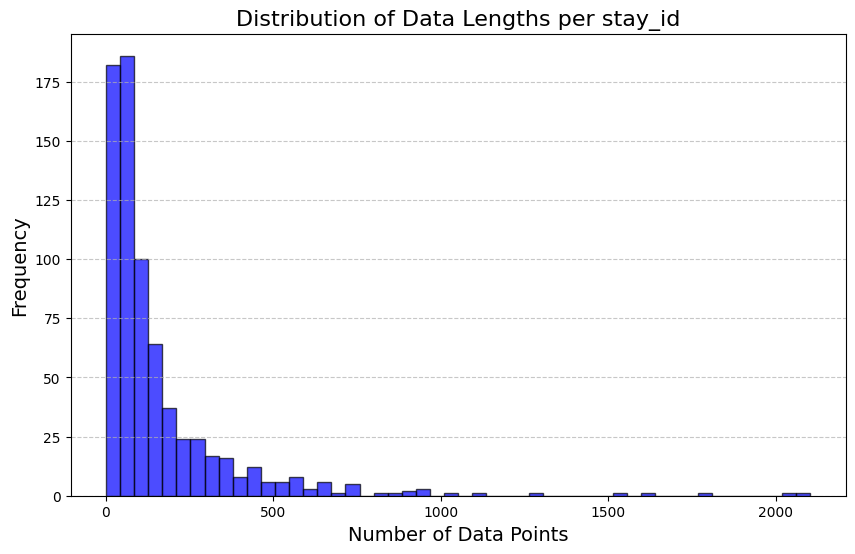

In [ ]:
import matplotlib.pyplot as plt
#timestep을 정하기 위한 분포
# 각 stay_id별 데이터 길이 계산
grouped = Fully_Preprocessed_Data.groupby('stay_id')
group_lengths = grouped.size().values  # 각 stay_id 그룹의 데이터 길이

# 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(group_lengths, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Data Lengths per stay_id', fontsize=16)
plt.xlabel('Number of Data Points', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

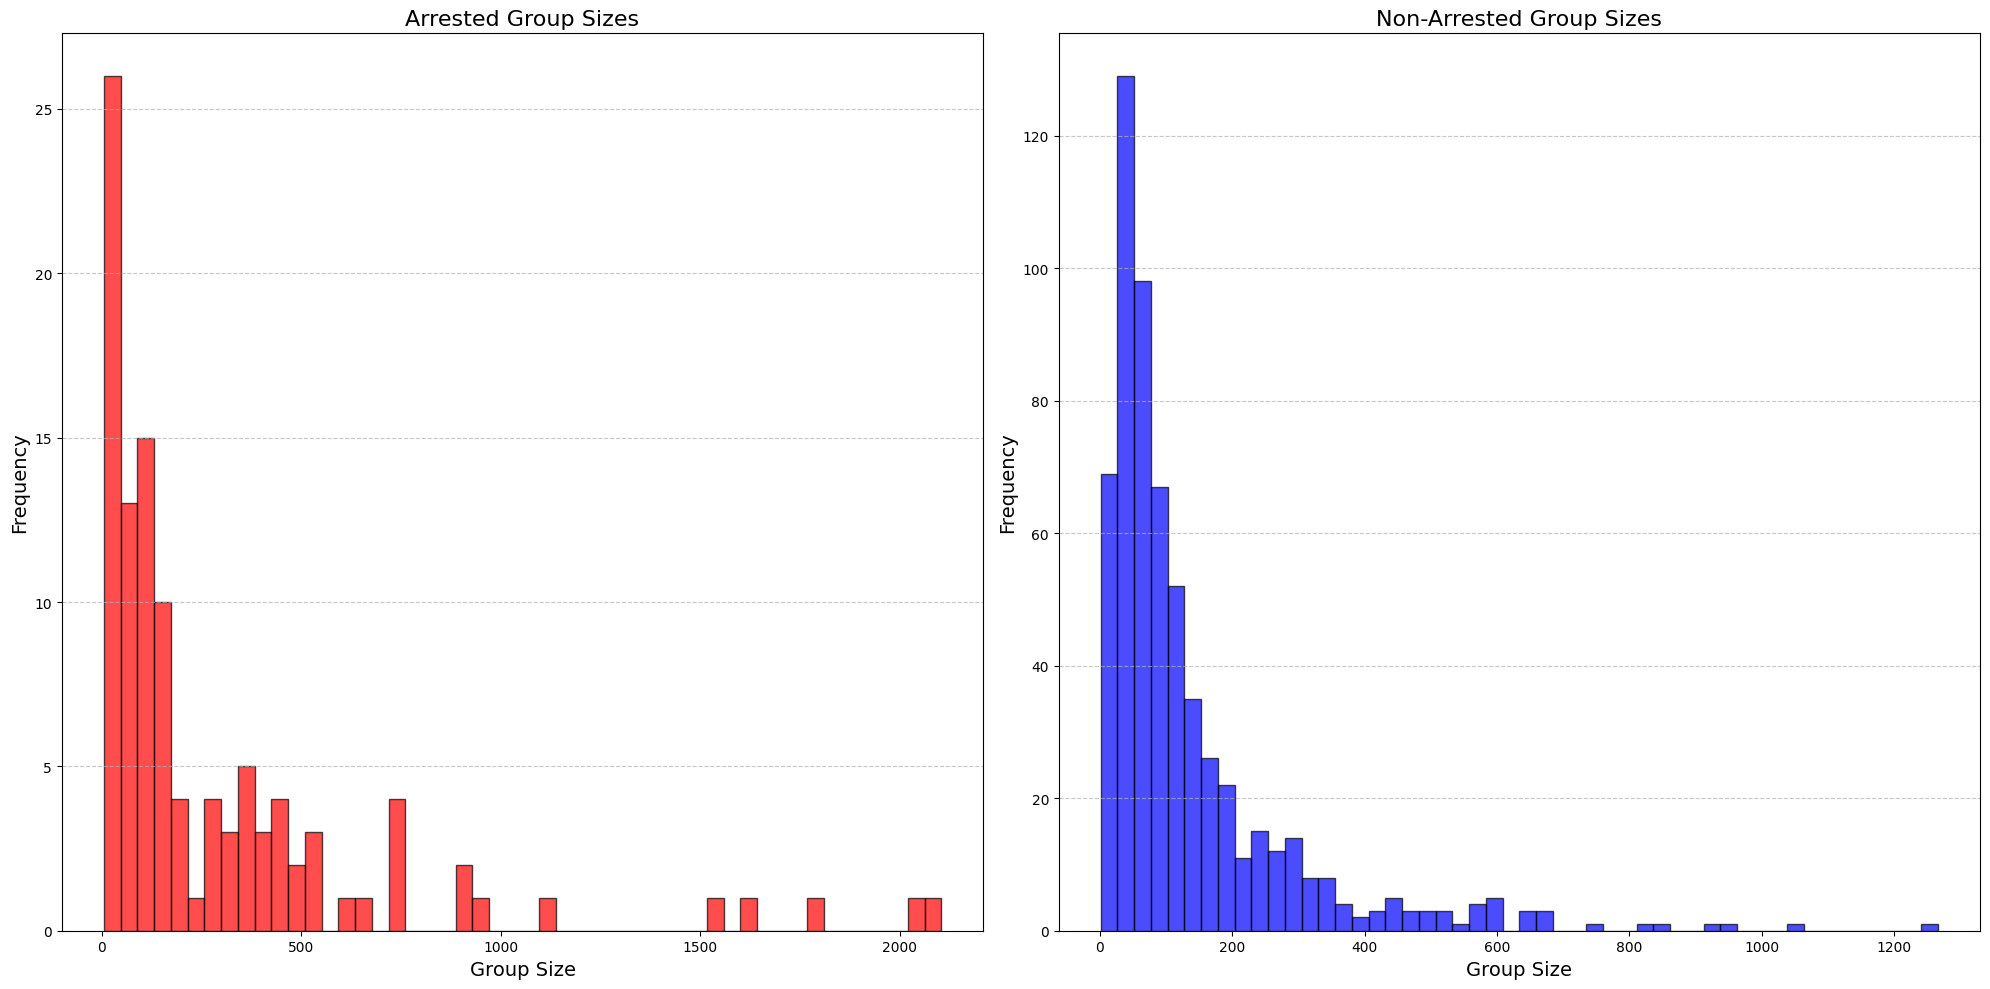

,Arrested,Non-Arrested
count,108.000000,612.000000
mean,297.879630,134.950980
std,416.101504,156.220178
min,5.000000,1.000000
25%,48.000000,43.000000
50%,130.000000,79.000000
75%,382.250000,158.250000
max,2104.000000,1267.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
data = Fully_Preprocessed_Data

# 심정지가 발생한 환자와 발생하지 않은 환자의 group 크기 비교
arrested_groups = data[data['arrested'] == 1].groupby('stay_id').size()  # 심정지가 발생한 그룹
non_arrested_groups = data[data['arrested'] == 0].groupby('stay_id').size()  # 심정지가 발생하지 않은 그룹



# 그래프 분리하여 시각화
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# 1. Arrested Group Sizes
axes[0].hist(arrested_groups.values, bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0].set_title('Arrested Group Sizes', fontsize=16)
axes[0].set_xlabel('Group Size', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Non-Arrested Group Sizes
axes[1].hist(non_arrested_groups.values, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1].set_title('Non-Arrested Group Sizes', fontsize=16)
axes[1].set_xlabel('Group Size', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()
# 4분위수 출력
arrested_stats = arrested_groups.describe()
non_arrested_stats = non_arrested_groups.describe()
all_stats = pd.concat([arrested_stats, non_arrested_stats], axis=1)
all_stats.columns = ['Arrested', 'Non-Arrested']
all_stats


In [ ]:
data_in_60_minutes_combined.to_csv('/content/drive/MyDrive/DA_project/data_in_60_minutes_combined.csv', index=False)

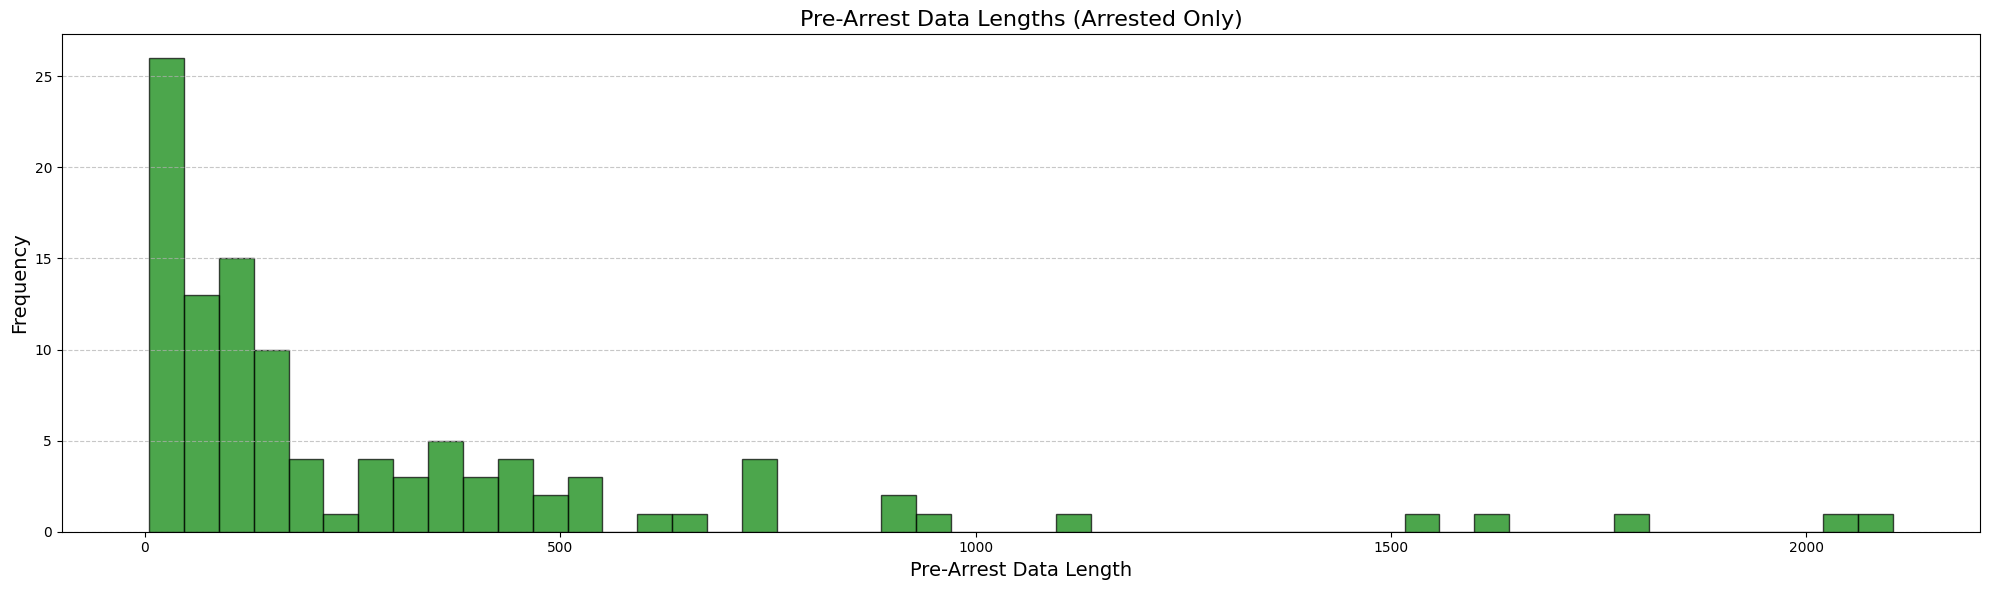

In [ ]:
pre_arrest_lengths = []

# 심정지가 발생한 환자만 처리
arrested_data = data[data['arrested'] == 1]

for stay_id, group in arrested_data.groupby('stay_id'):
    if (group['cardiac_arrest'] == 1).any():
        # 심정지 발생 시점의 인덱스 찾기
        arrest_idx = group[group['cardiac_arrest'] == 1].index[0]
        # 심정지 이전 데이터 길이 계산
        pre_arrest_lengths.append(len(group.iloc[:arrest_idx]))  # 발생 시점 이전 데이터 길이
    else:
        pre_arrest_lengths.append(0)  # 심정지가 없으면 0
# 3. Pre-Arrest Data Lengths (Arrested Only)
fig, ax = plt.subplots(1, figsize=(20, 6))  # 단일 축 생성

# 히스토그램 시각화
ax.hist(pre_arrest_lengths, bins=50, color='green', alpha=0.7, edgecolor='black')
ax.set_title('Pre-Arrest Data Lengths (Arrested Only)', fontsize=16)
ax.set_xlabel('Pre-Arrest Data Length', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Feature 목록을 직접 지정
scaling_features = [
    'Arterial Blood Pressure diastolic',
    'Arterial Blood Pressure systolic',
    'Heart Rate',
    'Non Invasive Blood Pressure diastolic',
    'Non Invasive Blood Pressure systolic',
    'O2 saturation pulseoxymetry',
    'Respiratory Rate',
    'Temperature Celsius',
    'Arterial Blood Pressure missing',
    'Temperature Celsius missing'
]

# 그룹화 및 데이터 생성
grouped = Fully_Preprocessed_Data.groupby('stay_id')  # stay_id로 그룹화
group_lengths = grouped.size().values  # 각 그룹의 데이터 길이
time_steps = int(np.percentile(group_lengths, 95))  # 95% 백분위수 기준 time_steps 설정

X = []
y = []

# 그룹별 데이터 처리
for stay_id, group in grouped:
    group_data = group[scaling_features].values  # 지정된 Feature 값만 가져오기

    # 긴 그룹은 마지막 time_steps만 사용
    if len(group_data) > time_steps:
        group_data = group_data[-time_steps:]  # 마지막 time_steps 유지

    # 패딩 처리
    padded_data = np.zeros((time_steps, len(scaling_features)))  # time_steps x feature 크기의 0 패딩
    padded_data[:len(group_data), :] = group_data  # 실제 데이터 채우기

    X.append(padded_data)
    y.append(group['arrested'].iloc[0])  # stay_id 단위로 레이블 설정

# 리스트를 numpy 배열로 변환
X = np.array(X)  # (샘플 수, time_steps, feature 수)
y = np.array(y)  # (샘플 수,)

# 결과 확인
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (720, 562, 10), y shape: (720,)


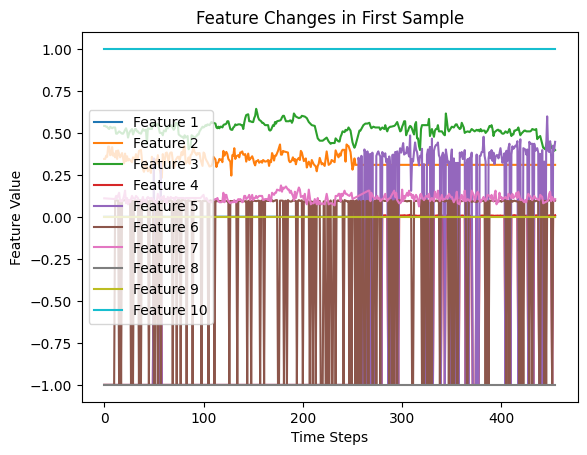

In [ ]:
import matplotlib.pyplot as plt

# 첫 번째 샘플
first_sample = X[3]

# 각 Feature의 변화 시각화
for feature_idx in range(first_sample.shape[1]):
    plt.plot(first_sample[:, feature_idx], label=f'Feature {feature_idx + 1}')

plt.title("Feature Changes in First Sample")
plt.xlabel("Time Steps")
plt.ylabel("Feature Value")
plt.legend()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# 데이터 Reshape
X_flat = X.reshape(X.shape[0], -1)  # (샘플 수, time_steps * feature 수)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flat, y)

# Reshape to 3D
X_resampled = X_resampled.reshape(-1, time_steps, X.shape[2])
X = X_resampled
y = y_resampled


### 쓸데없는 모델 출력

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Lambda, Multiply
import numpy as np
import matplotlib.pyplot as plt


# Step 1: 입력 정의
input_layer = Input(shape=(time_steps, len(scaling_features)))

# Step 2: 마스킹 및 LSTM 레이어
masked_layer = Masking(mask_value=-1)(input_layer)
lstm_out = LSTM(64, return_sequences=True)(masked_layer)

# Step 3: 시간별 Attention
time_attention_scores = Dense(1, activation='tanh')(lstm_out)
time_attention_weights = Lambda(lambda x: tf.expand_dims(tf.nn.softmax(tf.squeeze(x, axis=-1), axis=1), axis=-1))(time_attention_scores)
time_context_vector = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1))([time_attention_weights, lstm_out])

# Step 4: Feature별 Attention
# time_context_vector를 Feature 차원으로 확장
time_context_vector_expanded = Dense(len(scaling_features))(time_context_vector)  # (batch_size, len(scaling_features))
feature_attention_scores = Dense(len(scaling_features), activation='tanh')(time_context_vector_expanded)
feature_attention_weights = Lambda(lambda x: tf.nn.softmax(x, axis=-1))(feature_attention_scores)

# Feature별 가중치 적용
weighted_features = Multiply()([time_context_vector_expanded, feature_attention_weights])  # (batch_size, len(scaling_features))

# Step 5: 최종 출력
output = Dense(1, activation='sigmoid')(weighted_features)

# 모델 생성
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: 모델 학습
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_1' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 562, 10)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 562, 10)        │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking (Masking)         │ (None, 562, 10)        │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any (Any)                 │ (None, 562)            │              0 │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 562, 64)        │         19,200 │ masking[0][0],         │
│                           │                        │                │ any[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 562, 1)         │             65 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 562, 1)         │              0 │ dense[0][0], any[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 64)             │              0 │ lambda[0][0],          │
│                           │                        │                │ lstm[0][0], any[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 10)             │            650 │ lambda_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 10)             │            110 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 10)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 10)             │              0 │ dense_1[0][0],         │
│                           │                        │                │ lambda_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             11 │ multiply[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 20,036 (78.27 KB)

 Trainable params: 20,036 (78.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 342ms/step - accuracy: 0.6272 - loss: 0.6870 - val_accuracy: 0.6860 - val_loss: 0.6524
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 435ms/step - accuracy: 0.7295 - loss: 0.6291 - val_accuracy: 0.6860 - val_loss: 0.6224
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - accuracy: 0.6966 - loss: 0.6246 - val_accuracy: 0.6860 - val_loss: 0.6191
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 360ms/step - accuracy: 0.6750 - loss: 0.6292 - val_accuracy: 0.6860 - val_loss: 0.6170
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 434ms/step - accuracy: 0.7023 - loss: 0.6067 - val_accuracy: 0.6860 - val_loss: 0.6162
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - accuracy: 0.6930 - loss: 0.6153 - val_accuracy: 0.6860 - val_loss: 0.6143
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 428ms/step - accuracy: 0.7324 - loss: 0.5764 - val_accuracy: 0.6860 - val_loss: 0.6105
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.6942 - loss: 0.6113 - val_accuracy

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step


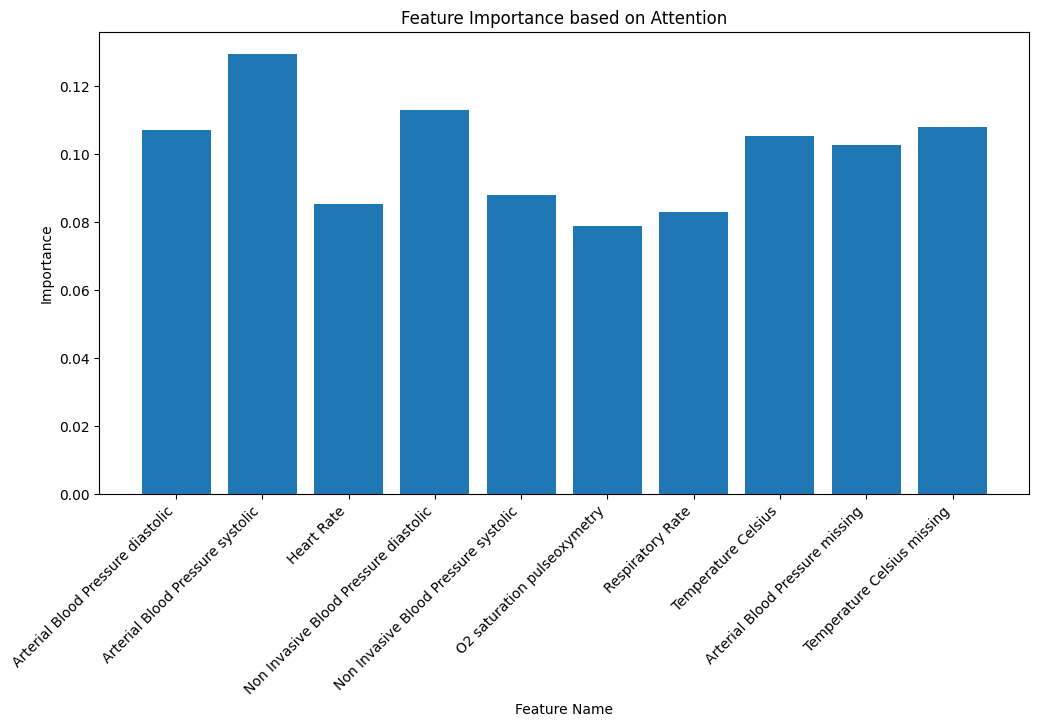

In [ ]:
# Step 7: Feature Attention 가중치 분석
feature_attention_model = Model(inputs=model.input, outputs=feature_attention_weights)
feature_weights_output = feature_attention_model.predict(X_test)  # Feature별 Attention 가중치 예측

# Feature 중요도 계산
average_feature_weights = np.mean(feature_weights_output, axis=0)  # Feature별 평균 중요도

# Feature 이름과 중요도 매핑
feature_importance = dict(zip(scaling_features, average_feature_weights))

# Step 8: Feature 중요도 시각화
plt.figure(figsize=(12, 6))
plt.bar(feature_importance.keys(), feature_importance.values())
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.title("Feature Importance based on Attention")
plt.xticks(rotation=45, ha="right")
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step
Accuracy (정확도): 0.70
Sensitivity (민감도, Recall): 0.71
F1 Score: 0.70


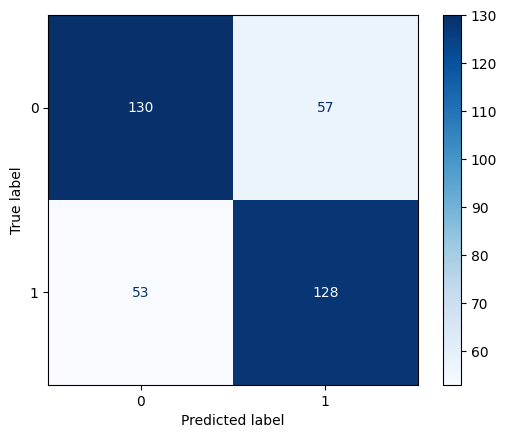

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # 임계값 0.5로 이진 분류

# 혼동 행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# 정확도, 민감도, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)  # 민감도(Sensitivity)
f1 = f1_score(y_test, y_pred_classes)

# 결과 출력
print(f"Accuracy (정확도): {accuracy:.2f}")
print(f"Sensitivity (민감도, Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


In [ ]:
# 시간별 Attention 가중치를 출력하는 서브 모델 생성
time_attention_model = Model(inputs=model.input, outputs=time_attention_weights)


In [ ]:
# 샘플 입력 데이터로 가중치 계산
sample_input = X_test[:5]  # 테스트 데이터의 일부 샘플
attention_weights = time_attention_model.predict(sample_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


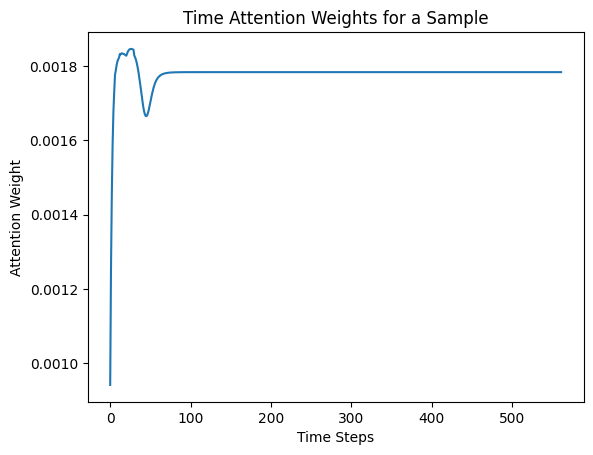

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 배치의 첫 번째 샘플에 대한 Attention 가중치 시각화
sample_weights = np.squeeze(attention_weights[0])  # 첫 번째 샘플의 가중치
plt.plot(sample_weights)
plt.title("Time Attention Weights for a Sample")
plt.xlabel("Time Steps")
plt.ylabel("Attention Weight")
plt.show()


Sum of Attention Weights (Should be close to 1 for all samples):
[1. 1. 1. 1. 1.]


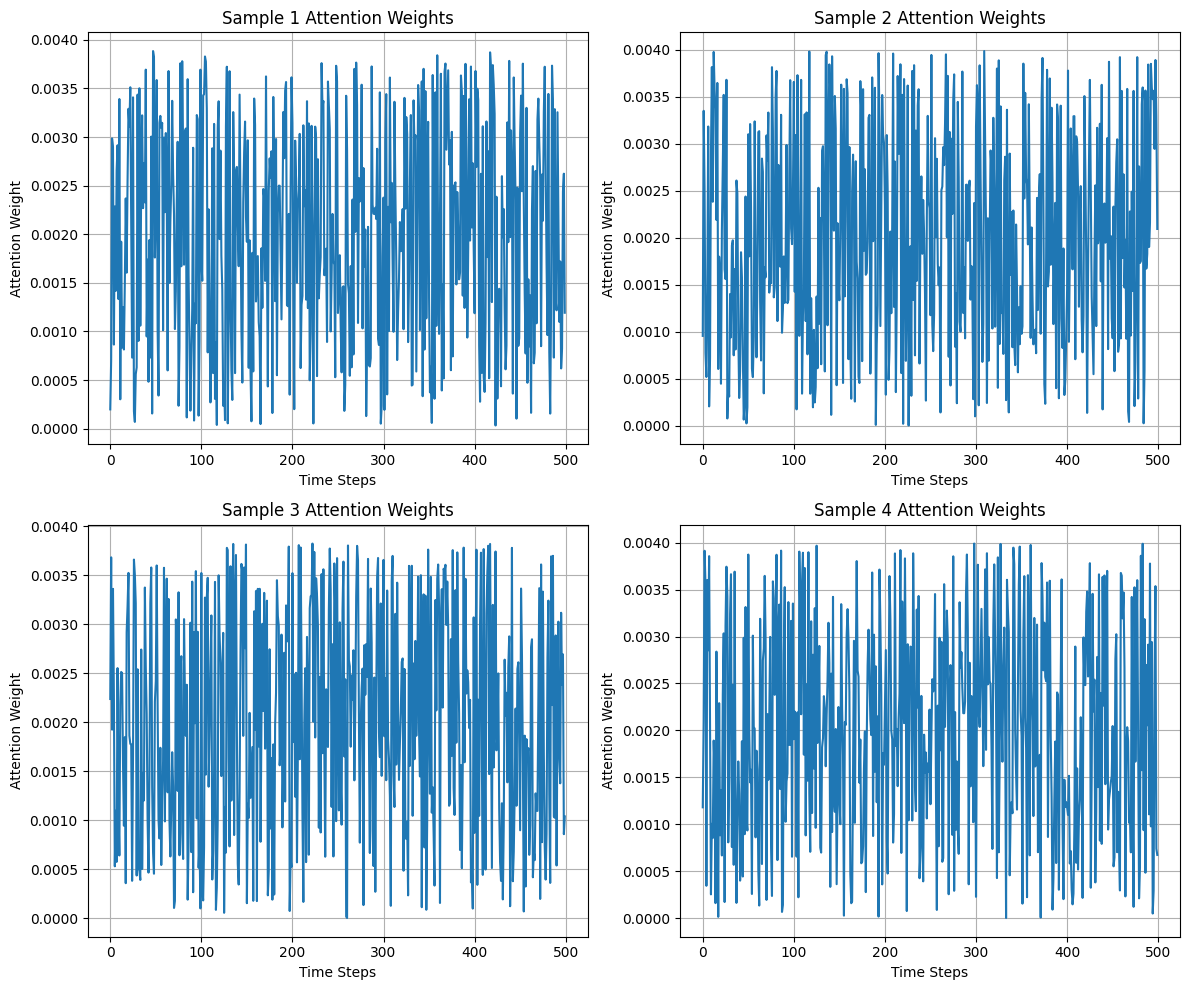

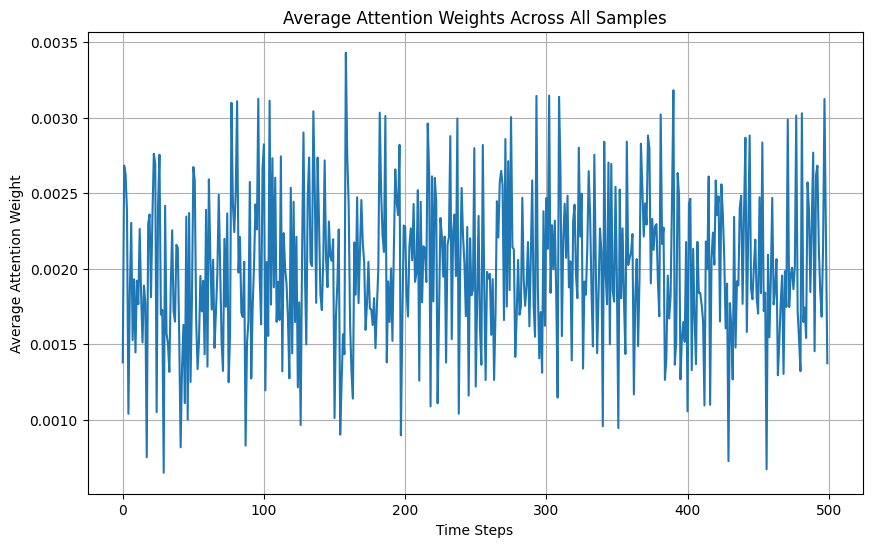

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Attention weights (dummy data for simulation since real data is not available)
# Replace `attention_weights` with actual model output in practice
attention_weights = np.random.random((5, 500, 1))  # Simulating 5 samples with 500 time steps
attention_weights = attention_weights / np.sum(attention_weights, axis=1, keepdims=True)  # Normalize

# 1. Checking sum of attention weights for each sample (should sum to 1)
sum_attention_weights = np.sum(attention_weights, axis=1)
print("Sum of Attention Weights (Should be close to 1 for all samples):")
print(sum_attention_weights.flatten())

# 2. Visualizing normalized attention weights for the first few samples
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axs.flatten()):
    if i < attention_weights.shape[0]:  # Ensure we don't exceed the number of samples
        sample_weights = np.squeeze(attention_weights[i])
        ax.plot(sample_weights)
        ax.set_title(f"Sample {i + 1} Attention Weights")
        ax.set_xlabel("Time Steps")
        ax.set_ylabel("Attention Weight")
        ax.grid()

plt.tight_layout()
plt.show()

# 3. Computing the mean of attention weights across all samples (average pattern)
mean_attention_weights = np.mean(attention_weights, axis=0)

# Plotting the average attention weights across all samples
plt.figure(figsize=(10, 6))
plt.plot(np.squeeze(mean_attention_weights))
plt.title("Average Attention Weights Across All Samples")
plt.xlabel("Time Steps")
plt.ylabel("Average Attention Weight")
plt.grid()
plt.show()






# 정해진 시간 내 바이탈의 변화

### 응급실 테스트 데이터

In [ ]:
df_filled = pd.read_csv('/content/drive/MyDrive/DA_project/df_filled.csv')
# List of columns to exclude from scaling
exclude_columns = [
    'stay_id', 'charttime', 'Arterial Blood Pressure missing',
    'Temperature Celsius missing'
]

# Identify columns to scale
scaling_features = [
    col for col in df_filled.columns if col not in exclude_columns
]

# Step 1: Replace -1 with NaN for scaling
df_filled[scaling_features] = df_filled[scaling_features].replace(-1, np.nan)

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
df_filled[scaling_features] = scaler.fit_transform(df_filled[scaling_features])

# Step 3: Restore -1 for missing values
df_filled[scaling_features] = df_filled[scaling_features].fillna(-1)
df_filled_scale = df_filled
# Display the first few rows of the scaled dataframe

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
# Replace the placeholder `df_filled_scale` with the actual DataFrame `df_filled`
df_filled_scale = df_filled.copy()

# Step 1: 심정지가 발생하지 않은 데이터 필터링
non_arrested_data = df_filled_scale[df_filled_scale['arrested'] == 0].copy()

# charttime을 datetime 형식으로 변환
non_arrested_data['charttime'] = pd.to_datetime(non_arrested_data['charttime'])

# Step 2: 데이터 그룹화 및 1시간 기준으로 샘플링
random_sampled_data = []

for stay_id, group in non_arrested_data.groupby('stay_id'):
    group = group.sort_values('charttime')  # charttime 기준 정렬

    # 데이터가 5개 이상인 경우만 처리
    if len(group) >= 5:
        # 전체 시간 범위에서 랜덤으로 시작 시간 선택
        max_start_time = group['charttime'].max() - pd.Timedelta(minutes=60)
        random_start_time = group['charttime'].sample(n=1).iloc[0]

        # 선택한 1시간 창에 맞는 데이터 필터링
        start_time = max(random_start_time, group['charttime'].min())
        end_time = start_time + pd.Timedelta(minutes=60)

        time_window = group[(group['charttime'] >= start_time) & (group['charttime'] <= end_time)]

        # 5개의 데이터가 되도록 고정 (과도한 경우 균등 간격으로 샘플링)
        if len(time_window) > 5:
            indices = np.linspace(0, len(time_window) - 1, 5).astype(int)
            time_window = time_window.iloc[indices]
        # 부족한 경우: 시간 프레임 재색인 및 보간
        elif len(time_window) < 5:
            time_index = pd.date_range(start=start_time, end=end_time, periods=5)
            time_window = time_window.set_index('charttime').reindex(time_index)
            time_window.index.name = 'charttime'
            time_window = time_window.interpolate(method='linear').reset_index()

        # 조정된 데이터를 리스트에 추가
        random_sampled_data.append(time_window)

# Step 3: 데이터 병합 및 정렬
random_sampled_combined = pd.concat(random_sampled_data)
random_sampled_combined = random_sampled_combined.sort_values(['stay_id', 'charttime'])

# Step 4: 데이터 저장
output_path = '/content/drive/MyDrive/DA_project/ed_test_set.csv'
random_sampled_combined.to_csv(output_path, index=False)

# 결과 확인
random_sampled_combined.head(10)


,stay_id,charttime,Temperature Celsius,Heart Rate,Respiratory Rate,O2 saturation pulseoxymetry,Arterial Blood Pressure systolic,Arterial Blood Pressure diastolic,Non Invasive Blood Pressure diastolic,Non Invasive Blood Pressure systolic,Arterial Blood Pressure missing,Temperature Celsius missing,arrested,cardiac_arrest
1176,30001785.0,2151-09-02 16:32:00,0.648649,0.516854,0.400000,1.0,0.476793,0.538462,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1178,30001785.0,2151-09-02 16:52:00,0.648649,0.516854,0.400000,1.0,0.489451,0.493590,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1180,30001785.0,2151-09-02 17:07:00,0.648649,0.511236,0.400000,1.0,0.413502,0.435897,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1182,30001785.0,2151-09-02 17:17:00,0.648649,0.516854,0.563636,1.0,0.468354,0.474359,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1184,30001785.0,2151-09-02 17:32:00,0.648649,0.516854,0.400000,1.0,0.489451,0.480769,-1.0,-1.0,-1.0,-1.0,0.0,0.0
0,30004017.0,2151-05-31 17:47:00,0.654054,0.275281,0.327273,1.0,0.413502,0.301282,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1,30004017.0,2151-05-31 18:02:00,0.659459,0.275281,0.327273,1.0,0.400844,0.275641,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2,30004017.0,2151-05-31 18:17:00,0.663063,0.286517,0.327273,1.0,0.410689,0.277778,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3,30004017.0,2151-05-31 18:32:00,0.666667,0.297753,0.327273,1.0,0.420534,0.279915,-1.0,-1.0,-1.0,-1.0,0.0,0.0
4,30004017.0,2151-05-31 18:47:00,0.670270,0.308989,0.327273,1.0,0.430380,0.282051,-1.0,-1.0,-1.0,-1.0,0.0,0.0


### 1시간 5개 기준

In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DA_project/Fully_Preprocessed_Data.csv')
# 데이터 변환
data['charttime'] = pd.to_datetime(data['charttime'])

# Step 2: 심정지가 발생한 시간과 입원 시간을 계산
time_to_arrest = []

for stay_id, group in data.groupby('stay_id'):
    # 입원 시간 (최초 charttime)
    admit_time = group['charttime'].min()
    # 심정지 발생 시간 (cardiac_arrest == 1)
    arrest_time = group[group['cardiac_arrest'] == 1]['charttime'].min()

    # 심정지 발생 시간이 존재하는 경우에만 계산
    if pd.notnull(arrest_time):
        duration = (arrest_time - admit_time).total_seconds() / 60  # 분 단위로 변환
        time_to_arrest.append({'stay_id': stay_id, 'time_to_arrest_minutes': duration})

# 결과를 데이터프레임으로 저장
time_to_arrest_df = pd.DataFrame(time_to_arrest)
filtered_time_to_arrest = time_to_arrest_df[time_to_arrest_df['time_to_arrest_minutes'] > 60]

# 심정지 발생 60분 전 데이터 필터링 및 저장
data_in_60_minutes = []

for stay_id in filtered_time_to_arrest['stay_id']:
    group = data[data['stay_id'] == stay_id].sort_values('charttime')
    arrest_time = group[group['cardiac_arrest'] == 1]['charttime'].min()

    if pd.notnull(arrest_time):
        # 60분 전의 시작 시간
        start_time = arrest_time - pd.Timedelta(minutes=60)
        # 60분 동안의 데이터 필터링
        time_window = group[(group['charttime'] >= start_time) & (group['charttime'] <= arrest_time)]
        data_in_60_minutes.append(time_window)

# 데이터 병합
data_in_60_minutes_combined = pd.concat(data_in_60_minutes)

# 결과 확인
data_in_60_minutes_combined

rows_per_stay_id = data_in_60_minutes_combined.groupby('stay_id').size().reset_index(name='row_count')
rows_per_stay_id


,stay_id,row_count
0,30175599,7
1,30183853,3
2,30249160,3
3,30308646,4
4,30487649,4
...,...,...
85,39582132,3
86,39629292,6
87,39704881,5
88,39866919,3


from matplotlib import pyplot as plt
rows_per_stay_id['stay_id'].plot(kind='hist', bins=20, title='stay_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rows_per_stay_id['row_count'].plot(kind='hist', bins=20, title='row_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rows_per_stay_id.plot(kind='scatter', x='stay_id', y='row_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['stay_id']
  ys = series['row_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rows_per_stay_id.sort_values('stay_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stay_id')
_ = plt.ylabel('row_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['stay_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'stay_id'}, axis=1)
              .sort_values('stay_id', ascending=True))
  xs = counted['stay_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rows_per_stay_id.sort_values('stay_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stay_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
rows_per_stay_id['stay_id'].plot(kind='line', figsize=(8, 4), title='stay_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rows_per_stay_id['row_count'].plot(kind='line', figsize=(8, 4), title='row_count')
plt.gca().spines[['top', 'right']].set_visible(False)

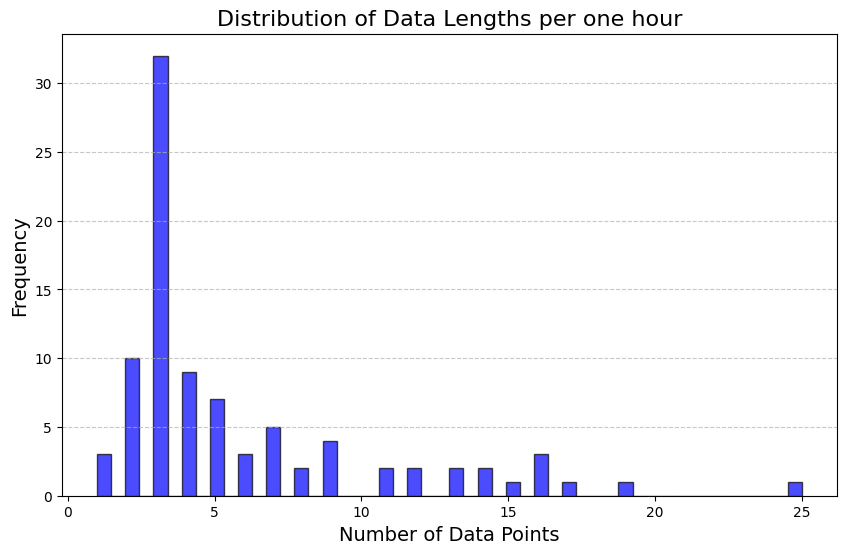

In [6]:
import matplotlib.pyplot as plt
#timestep을 정하기 위한 분포
# 각 stay_id별 데이터 길이 계산



# 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(rows_per_stay_id['row_count'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Data Lengths per one hour', fontsize=16)
plt.xlabel('Number of Data Points', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#timestep을 정하기 위한 분포
# 각 stay_id별 데이터 길이 계산
grouped = Fully_Preprocessed_Data.groupby('stay_id')
group_lengths = grouped.size().values  # 각 stay_id 그룹의 데이터 길이

# 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(group_lengths, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Data Lengths per stay_id', fontsize=16)
plt.xlabel('Number of Data Points', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
features_to_process = [
    'Temperature Celsius',
    'Heart Rate',
    'Respiratory Rate',
    'O2 saturation pulseoxymetry',
    'Arterial Blood Pressure systolic',
    'Arterial Blood Pressure diastolic'
]

# Process only the selected features, leaving others as -1
adjusted_data = []

for stay_id, group in filtered_data.groupby('stay_id'):
    group = group.sort_values('charttime')  # charttime 기준 정렬

    # cardiac_arrest = 1인 첫 번째 시간 확인
    arrest_time = group.loc[group['cardiac_arrest'] == 1, 'charttime'].min()

    if pd.notna(arrest_time):  # cardiac_arrest = 1이 존재하는 경우
        # cardiac_arrest = 1 이전 데이터만 필터링
        group = group[group['charttime'] < arrest_time]

    # 데이터가 5개 이상인 경우만 처리
    if len(group) >= 5:
        group = group.tail(5)  # 마지막 5개 데이터 선택

        # 고정된 시간 간격 생성 (target_row_count 개수에 맞춤)
        time_index = pd.date_range(start=group['charttime'].min(), end=group['charttime'].max(), periods=5)

        # 새로운 시간 프레임 생성
        group = group.set_index('charttime').reindex(time_index)  # 고정 시간으로 재색인
        group.index.name = 'charttime'

        # 결측값 보간
        for feature in features_to_process:
            group[feature] = group[feature].interpolate(method='linear')  # 선형 보간법 적용

        # 나머지 피처는 -1로 채워두기
        for feature in group.columns:
            if feature not in features_to_process and feature != 'charttime':
                group[feature] = -1

        group = group.reset_index()

        # 조정된 데이터를 리스트에 추가
        adjusted_data.append(group)

# Step 5: 조정된 데이터 병합 및 정렬
adjusted_data_combined = pd.concat(adjusted_data).sort_values(['stay_id', 'charttime'])

# Step 6: 결과 저장
output_path = '/content/drive/MyDrive/DA_project/ed_test_set.csv'
adjusted_data_combined.to_csv(output_path, index=False)

# 결과 확인
adjusted_data_combined.head(), output_path


(            charttime  stay_id  Arterial Blood Pressure diastolic  \
 0 2138-07-25 06:30:00       -1                           0.001318   
 1 2138-07-25 06:41:15       -1                           0.001310   
 2 2138-07-25 06:52:30       -1                           0.001301   
 3 2138-07-25 07:03:45       -1                           0.001292   
 4 2138-07-25 07:15:00       -1                           0.001283   
 
    Arterial Blood Pressure systolic  Heart Rate  \
 0                          0.271565    0.399194   
 1                          0.265974    0.390121   
 2                          0.260383    0.381048   
 3                          0.254792    0.371976   
 4                          0.249201    0.362903   
 
    Non Invasive Blood Pressure diastolic  \
 0                                     -1   
 1                                     -1   
 2                                     -1   
 3                                     -1   
 4                                     

In [ ]:
import pandas as pd
import numpy as np

# Step 1: 심정지가 발생하지 않은 데이터 필터링
non_arrested_data = data[data['arrested'] == 0].copy()

# charttime을 datetime 형식으로 변환
non_arrested_data['charttime'] = pd.to_datetime(non_arrested_data['charttime'])

# Step 2: 데이터 그룹화 및 1시간 기준으로 샘플링
random_sampled_data = []

for stay_id, group in non_arrested_data.groupby('stay_id'):
    group = group.sort_values('charttime')  # charttime 기준 정렬

    # 데이터가 5개 이상인 경우만 처리
    if len(group) >= 5:
        # 전체 시간 범위에서 랜덤으로 시작 시간 선택
        max_start_time = group['charttime'].max() - pd.Timedelta(minutes=60)
        random_start_time = group['charttime'].sample(n=1).iloc[0]

        # 선택한 1시간 창에 맞는 데이터 필터링
        start_time = max(random_start_time, group['charttime'].min())
        end_time = start_time + pd.Timedelta(minutes=60)

        time_window = group[(group['charttime'] >= start_time) & (group['charttime'] <= end_time)]

        # 5개의 데이터가 되도록 고정 (과도한 경우 균등 간격으로 샘플링)
        if len(time_window) > 5:
            indices = np.linspace(0, len(time_window) - 1, 5).astype(int)
            time_window = time_window.iloc[indices]
        # 부족한 경우: 시간 프레임 재색인 및 보간
        elif len(time_window) < 5:
            time_index = pd.date_range(start=start_time, end=end_time, periods=5)
            time_window = time_window.set_index('charttime').reindex(time_index)
            time_window.index.name = 'charttime'
            time_window = time_window.interpolate(method='linear').reset_index()

        # 조정된 데이터를 리스트에 추가
        random_sampled_data.append(time_window)

# Step 3: 데이터 병합 및 정렬
random_sampled_combined = pd.concat(random_sampled_data)
random_sampled_combined = random_sampled_combined.sort_values(['stay_id', 'charttime'])

# Step 4: 데이터 저장
random_sampled_combined.to_csv('/content/drive/MyDrive/DA_project/non_arrested_adjusted_data_fixed.csv', index=False)

# 결과 확인


In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, Permute, Multiply, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Step 1: 데이터 병합 및 준비
arrested_data = pd.read_csv('/content/drive/MyDrive/DA_project/adjusted_data_fixed.csv')
non_arrested_data = pd.read_csv('/content/drive/MyDrive/DA_project/non_arrested_adjusted_data_fixed.csv')

arrested_data['label'] = 1
non_arrested_data['label'] = 0
combined_data = pd.concat([arrested_data, non_arrested_data])

features = [
    'Arterial Blood Pressure diastolic',
    'Arterial Blood Pressure systolic',
    'Heart Rate',
    'Non Invasive Blood Pressure diastolic',
    'Non Invasive Blood Pressure systolic',
    'O2 saturation pulseoxymetry',
    'Respiratory Rate',
    'Temperature Celsius'
]

# Step 2: stay_id별로 피처와 라벨 생성
X = combined_data.groupby('stay_id')[features].apply(
    lambda group: group.values.reshape(1, 5, len(features))
).values  # (stay_id_samples, time_steps=5, num_features)
X = np.vstack(X)  # 그룹 리스트를 numpy 배열로 변환

y = combined_data.groupby('stay_id')['label'].first().values  # stay_id당 첫 번째 label 값을 사용

# 크기 확인
print(f"X.shape = {X.shape}, y.shape = {y.shape}")
time_steps = 5

from imblearn.over_sampling import SMOTE

# 데이터 Reshape
X_flat = X.reshape(X.shape[0], -1)  # (샘플 수, time_steps * feature 수)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flat, y)

# Reshape to 3D
X_resampled = X_resampled.reshape(-1, time_steps, X.shape[2])
X = X_resampled
y = y_resampled



X.shape = (695, 5, 8), y.shape = (695,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Lambda, Multiply
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: 입력 정의
time_steps = 5  # 시간 축의 길이
num_features = len(features)  # Feature의 수
input_layer = Input(shape=(time_steps, num_features))

# Step 2: 마스킹 및 LSTM 레이어
masked_layer = Masking(mask_value=-1)(input_layer)  # -1을 마스킹 처리
lstm_out = LSTM(64, return_sequences=True)(masked_layer)  # LSTM 레이어

# Step 3: 시간별 Attention
time_attention_scores = Dense(1, activation='tanh')(lstm_out)  # 시간별 Attention 스코어
time_attention_weights = Lambda(lambda x: tf.expand_dims(tf.nn.softmax(tf.squeeze(x, axis=-1), axis=1), axis=-1))(
    time_attention_scores)  # Attention 가중치 계산
time_context_vector = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1))([time_attention_weights, lstm_out])  # Context Vector

# Step 4: Feature별 Attention
time_context_vector_expanded = Dense(num_features)(time_context_vector)  # Feature 차원 확장
feature_attention_scores = Dense(num_features, activation='tanh')(time_context_vector_expanded)  # Feature별 Attention 스코어
feature_attention_weights = Lambda(lambda x: tf.nn.softmax(x, axis=-1))(feature_attention_scores)  # Feature Attention 가중치 계산

# Feature별 가중치 적용
weighted_features = Multiply()([time_context_vector_expanded, feature_attention_weights])

# Step 5: 최종 출력
output = Dense(1, activation='sigmoid')(weighted_features)  # 이진 분류 출력

# 모델 생성
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_38' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_39' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 5, 8)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_12 (NotEqual)   │ (None, 5, 8)           │              0 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking_12 (Masking)      │ (None, 5, 8)           │              0 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any_12 (Any)              │ (None, 5)              │              0 │ not_equal_12[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_13 (LSTM)            │ (None, 5, 64)          │         18,688 │ masking_12[0][0],      │
│                           │                        │                │ any_12[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_51 (Dense)          │ (None, 5, 1)           │             65 │ lstm_13[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_38 (Lambda)        │ (None, 5, 1)           │              0 │ dense_51[0][0],        │
│                           │                        │                │ any_12[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_39 (Lambda)        │ (None, 64)             │              0 │ lambda_38[0][0],       │
│                           │                        │                │ lstm_13[0][0],         │
│                           │                        │                │ any_12[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_52 (Dense)          │ (None, 8)              │            520 │ lambda_39[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_53 (Dense)          │ (None, 8)              │             72 │ dense_52[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_40 (Lambda)        │ (None, 8)              │              0 │ dense_53[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_13 (Multiply)    │ (None, 8)              │              0 │ dense_52[0][0],        │
│                           │                        │                │ lambda_40[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_54 (Dense)          │ (None, 1)              │              9 │ multiply_13[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 19,354 (75.60 KB)

 Trainable params: 19,354 (75.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5872 - loss: 0.6915 - val_accuracy: 0.5176 - val_loss: 0.6902
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5527 - loss: 0.6821 - val_accuracy: 0.5588 - val_loss: 0.6890
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5806 - loss: 0.6642 - val_accuracy: 0.6000 - val_loss: 0.6694
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6461 - loss: 0.6465 - val_accuracy: 0.5882 - val_loss: 0.6536
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6384 - loss: 0.6206 - val_accuracy: 0.6294 - val_loss: 0.6145
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6888 - loss: 0.5689 - val_accuracy: 0.6706 - val_loss: 0.6141
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7331 - loss: 0.5214 - val_accuracy: 0.7353 - val_loss: 0.5372
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7719 - loss: 0.5014 - val_accuracy: 0.7471 - val_los

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Accuracy (정확도): 0.76
Sensitivity (민감도, Recall): 0.87
F1 Score: 0.78


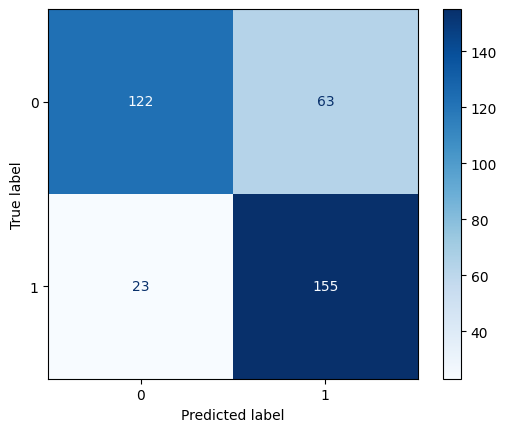

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # 임계값 0.5로 이진 분류

# 혼동 행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# 정확도, 민감도, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)  # 민감도(Sensitivity)
f1 = f1_score(y_test, y_pred_classes)

# 결과 출력
print(f"Accuracy (정확도): {accuracy:.2f}")
print(f"Sensitivity (민감도, Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_20' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_21' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


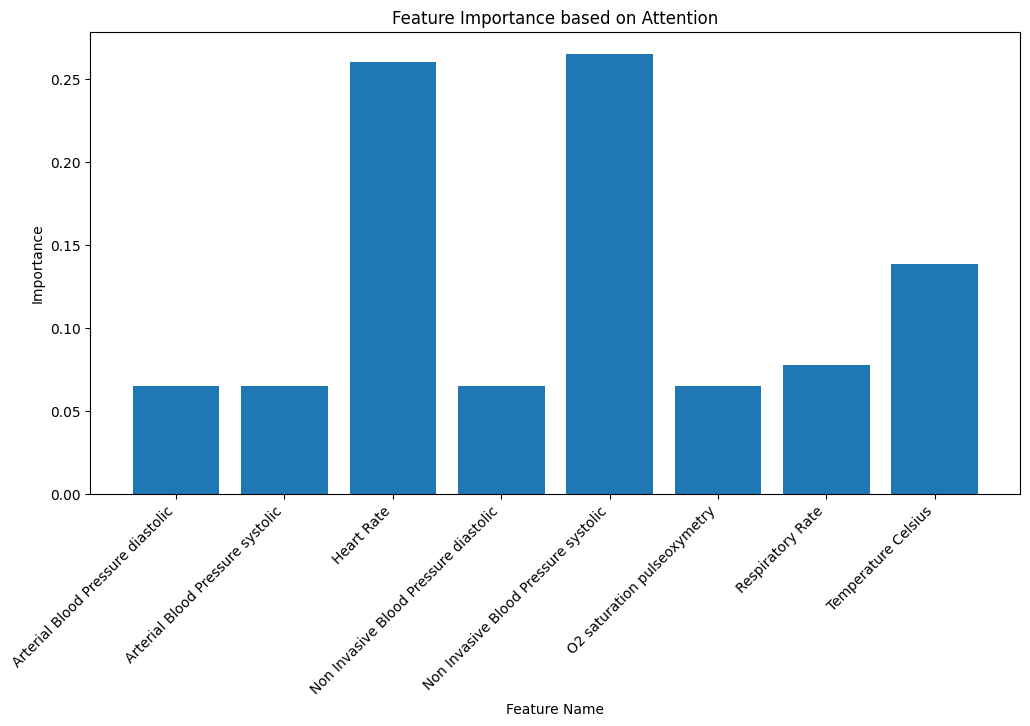

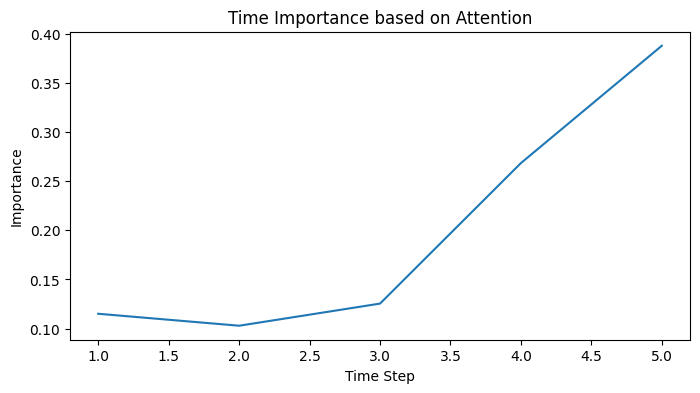

In [ ]:
# Step 8: Feature 및 시간별 Attention 분석
attention_model = Model(inputs=input_layer, outputs=[time_attention_weights, feature_attention_weights])
time_weights, feature_weights = attention_model.predict(X_test)

# Attention 가중치 시각화
import matplotlib.pyplot as plt

# Feature별 중요도 시각화
average_feature_weights = np.mean(feature_weights, axis=0)
plt.figure(figsize=(12, 6))
plt.bar(features, average_feature_weights)
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.title("Feature Importance based on Attention")
plt.xticks(rotation=45, ha="right")
plt.show()

# 시간별 Attention 중요도 시각화
average_time_weights = np.mean(time_weights, axis=0).squeeze()
plt.figure(figsize=(8, 4))
plt.plot(range(1, time_steps + 1), average_time_weights)
plt.xlabel("Time Step")
plt.ylabel("Importance")
plt.title("Time Importance based on Attention")
plt.show()

### 시간 기준 2시간 안의 timestep을 늘려서 확인

In [ ]:
import pandas as pd

# Step 1: 데이터 변환
data['charttime'] = pd.to_datetime(data['charttime'])

# Step 2: 심정지가 발생한 시간과 입원 시간을 계산
time_to_arrest = []

for stay_id, group in data.groupby('stay_id'):
    # 입원 시간 (최초 charttime)
    admit_time = group['charttime'].min()
    # 심정지 발생 시간 (cardiac_arrest == 1)
    arrest_time = group[group['cardiac_arrest'] == 1]['charttime'].min()

    # 심정지 발생 시간이 존재하는 경우에만 계산
    if pd.notnull(arrest_time):
        duration = (arrest_time - admit_time).total_seconds() / 60  # 분 단위로 변환
        time_to_arrest.append({'stay_id': stay_id, 'time_to_arrest_minutes': duration})

# 결과를 데이터프레임으로 저장
time_to_arrest_df = pd.DataFrame(time_to_arrest)

# 심정지 발생 120분 전만 필터링
filtered_time_to_arrest = time_to_arrest_df[time_to_arrest_df['time_to_arrest_minutes'] > 120]

# Step 3: 심정지 발생 120분 전 데이터 필터링 및 저장
data_in_120_minutes = []

for stay_id in filtered_time_to_arrest['stay_id']:
    group = data[data['stay_id'] == stay_id].sort_values('charttime')
    arrest_time = group[group['cardiac_arrest'] == 1]['charttime'].min()

    if pd.notnull(arrest_time):
        # 120분 전의 시작 시간
        start_time = arrest_time - pd.Timedelta(minutes=120)
        # 120분 동안의 데이터 필터링
        time_window = group[(group['charttime'] >= start_time) & (group['charttime'] <= arrest_time)]
        data_in_120_minutes.append(time_window)

# 데이터 병합
data_in_120_minutes_combined = pd.concat(data_in_120_minutes)

# Step 4: 데이터 요약 확인
rows_per_stay_id = data_in_120_minutes_combined.groupby('stay_id').size().reset_index(name='row_count')

# 평균 행 개수 확인 (전체 stay_id 기준)
average_row_count = rows_per_stay_id['row_count'].mean()
print(f"평균 행 개수 (2시간 기준): {average_row_count:.2f}")

# # 결과 확인
# data_in_120_minutes_combined.to_csv('/content/drive/MyDrive/DA_project/data_in_120_minutes_combined.csv', index=False)
# print("데이터가 120분 기준으로 저장되었습니다.")
#9개 기준으로

평균 행 개수 (2시간 기준): 8.85


In [ ]:
import pandas as pd
import numpy as np

# Step 1: charttime을 datetime 형식으로 변환
data_in_120_minutes_combined['charttime'] = pd.to_datetime(data_in_120_minutes_combined['charttime'])

# Step 2: 평균 데이터 개수 설정
target_row_count = 9  # 각 stay_id마다 맞출 데이터 개수
print(f"각 stay_id에 맞출 데이터 개수: {target_row_count}")

# Step 3: 데이터를 조정할 새로운 리스트 생성
adjusted_data = []

for stay_id, group in data_in_120_minutes_combined.groupby('stay_id'):
    group = group.sort_values('charttime')  # charttime 기준 정렬

    # 시작과 끝 시간을 가져옴
    start_time = group['charttime'].min()
    end_time = group['charttime'].max()

    # 고정된 시간 간격 생성 (target_row_count 개수에 맞춤)
    time_index = pd.date_range(start=start_time, end=end_time, periods=target_row_count)

    # 새로운 시간 프레임 생성
    group = group.set_index('charttime').reindex(time_index)  # 고정 시간으로 재색인
    group.index.name = 'charttime'

    # 결측값 보간
    group = group.interpolate(method='linear')  # 선형 보간법 적용
    group = group.reset_index()

    # 조정된 데이터를 리스트에 추가
    adjusted_data.append(group)

# Step 4: 조정된 데이터 병합
adjusted_data_combined = pd.concat(adjusted_data)

# Step 5: 데이터 정렬
adjusted_data_combined = adjusted_data_combined.sort_values(['stay_id', 'charttime'])

# Step 6: 결과 저장
adjusted_data_combined.to_csv('/content/drive/MyDrive/DA_project/adjusted_data_120_minutes_9_rows.csv', index=False)



각 stay_id에 맞출 데이터 개수: 9


In [ ]:
import pandas as pd
import numpy as np

# Step 1: 심정지가 발생하지 않은 데이터 필터링
non_arrested_data = data[data['arrested'] == 0].copy()

# charttime을 datetime 형식으로 변환
non_arrested_data['charttime'] = pd.to_datetime(non_arrested_data['charttime'])

# Step 2: 데이터 그룹화 및 2시간 기준으로 샘플링
random_sampled_data = []

for stay_id, group in non_arrested_data.groupby('stay_id'):
    group = group.sort_values('charttime')  # charttime 기준 정렬

    # 데이터가 9개 이상인 경우만 처리
    if len(group) >= 9:
        # 전체 시간 범위에서 랜덤으로 시작 시간 선택
        max_start_time = group['charttime'].max() - pd.Timedelta(minutes=120)
        random_start_time = group['charttime'].sample(n=1).iloc[0]

        # 선택한 2시간 창에 맞는 데이터 필터링
        start_time = max(random_start_time, group['charttime'].min())
        end_time = start_time + pd.Timedelta(minutes=120)

        time_window = group[(group['charttime'] >= start_time) & (group['charttime'] <= end_time)]

        # 9개의 데이터가 되도록 고정 (과도한 경우 균등 간격으로 샘플링)
        if len(time_window) > 9:
            indices = np.linspace(0, len(time_window) - 1, 9).astype(int)
            time_window = time_window.iloc[indices]
        # 부족한 경우: 시간 프레임 재색인 및 보간
        elif len(time_window) < 9:
            time_index = pd.date_range(start=start_time, end=end_time, periods=9)
            time_window = time_window.set_index('charttime').reindex(time_index)
            time_window.index.name = 'charttime'
            time_window = time_window.interpolate(method='linear').reset_index()

        # 조정된 데이터를 리스트에 추가
        random_sampled_data.append(time_window)

# Step 3: 데이터 병합 및 정렬
random_sampled_combined = pd.concat(random_sampled_data)
random_sampled_combined = random_sampled_combined.sort_values(['stay_id', 'charttime'])

# Step 4: 데이터 저장
random_sampled_combined.to_csv('/content/drive/MyDrive/DA_project/non_arrested_adjusted_data_120_minutes_9_rows.csv', index=False)




In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, Permute, Multiply, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Step 1: 데이터 병합 및 준비
arrested_data = pd.read_csv('/content/drive/MyDrive/DA_project/adjusted_data_120_minutes_9_rows.csv')
non_arrested_data = pd.read_csv('/content/drive/MyDrive/DA_project/non_arrested_adjusted_data_120_minutes_9_rows.csv')

arrested_data['label'] = 1
non_arrested_data['label'] = 0
combined_data = pd.concat([arrested_data, non_arrested_data])

features = [
    'Arterial Blood Pressure diastolic',
    'Arterial Blood Pressure systolic',
    'Heart Rate',
    'Non Invasive Blood Pressure diastolic',
    'Non Invasive Blood Pressure systolic',
    'O2 saturation pulseoxymetry',
    'Respiratory Rate',
    'Temperature Celsius'
]

# Step 2: stay_id별로 피처와 라벨 생성
X = combined_data.groupby('stay_id')[features].apply(
    lambda group: group.values.reshape(1, 9, len(features))
).values  # (stay_id_samples, time_steps=9, num_features)
X = np.vstack(X)  # 그룹 리스트를 numpy 배열로 변환

y = combined_data.groupby('stay_id')['label'].first().values  # stay_id당 첫 번째 label 값을 사용

# 크기 확인
print(f"X.shape = {X.shape}, y.shape = {y.shape}")


from imblearn.over_sampling import SMOTE
time_steps = 9
# 데이터 Reshape
X_flat = X.reshape(X.shape[0], -1)  # (샘플 수, time_steps * feature 수)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flat, y)

# Reshape to 3D
X_resampled = X_resampled.reshape(-1, time_steps, X.shape[2])
X = X_resampled
y = y_resampled



X.shape = (689, 9, 8), y.shape = (689,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Lambda, Multiply
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: 입력 정의
time_steps = 9  # 시간 축의 길이
num_features = len(features)  # Feature의 수
input_layer = Input(shape=(time_steps, num_features))

# Step 2: 마스킹 및 LSTM 레이어
masked_layer = Masking(mask_value=-1)(input_layer)  # -1을 마스킹 처리
lstm_out = LSTM(64, return_sequences=True)(masked_layer)  # LSTM 레이어

# Step 3: 시간별 Attention
time_attention_scores = Dense(1, activation='tanh')(lstm_out)  # 시간별 Attention 스코어
time_attention_weights = Lambda(lambda x: tf.expand_dims(tf.nn.softmax(tf.squeeze(x, axis=-1), axis=1), axis=-1))(
    time_attention_scores)  # Attention 가중치 계산
time_context_vector = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1))([time_attention_weights, lstm_out])  # Context Vector

# Step 4: Feature별 Attention
time_context_vector_expanded = Dense(num_features)(time_context_vector)  # Feature 차원 확장
feature_attention_scores = Dense(num_features, activation='tanh')(time_context_vector_expanded)  # Feature별 Attention 스코어
feature_attention_weights = Lambda(lambda x: tf.nn.softmax(x, axis=-1))(feature_attention_scores)  # Feature Attention 가중치 계산

# Feature별 가중치 적용
weighted_features = Multiply()([time_context_vector_expanded, feature_attention_weights])

# Step 5: 최종 출력
output = Dense(1, activation='sigmoid')(weighted_features)  # 이진 분류 출력

# 모델 생성
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_17' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_18' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 9, 8)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_5 (NotEqual)    │ (None, 9, 8)           │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking_5 (Masking)       │ (None, 9, 8)           │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any_5 (Any)               │ (None, 9)              │              0 │ not_equal_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 9, 64)          │         18,688 │ masking_5[0][0],       │
│                           │                        │                │ any_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 9, 1)           │             65 │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_17 (Lambda)        │ (None, 9, 1)           │              0 │ dense_23[0][0],        │
│                           │                        │                │ any_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_18 (Lambda)        │ (None, 64)             │              0 │ lambda_17[0][0],       │
│                           │                        │                │ lstm_6[0][0],          │
│                           │                        │                │ any_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 8)              │            520 │ lambda_18[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 8)              │             72 │ dense_24[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_19 (Lambda)        │ (None, 8)              │              0 │ dense_25[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_6 (Multiply)     │ (None, 8)              │              0 │ dense_24[0][0],        │
│                           │                        │                │ lambda_19[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 1)              │              9 │ multiply_6[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 19,354 (75.60 KB)

 Trainable params: 19,354 (75.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5458 - loss: 0.6908 - val_accuracy: 0.6923 - val_loss: 0.6770
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6805 - loss: 0.6633 - val_accuracy: 0.6864 - val_loss: 0.6417
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6864 - loss: 0.6126 - val_accuracy: 0.7041 - val_loss: 0.5983
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6808 - loss: 0.6020 - val_accuracy: 0.7574 - val_loss: 0.5679
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6831 - loss: 0.5892 - val_accuracy: 0.7101 - val_loss: 0.5509
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7185 - loss: 0.5493 - val_accuracy: 0.7633 - val_loss: 0.5228
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7057 - loss: 0.5287 - val_accuracy: 0.8047 - val_loss: 0.4869
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7775 - loss: 0.5006 - val_accuracy: 0.8166 - val_loss

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Accuracy (정확도): 0.79
Sensitivity (민감도, Recall): 0.97
F1 Score: 0.82


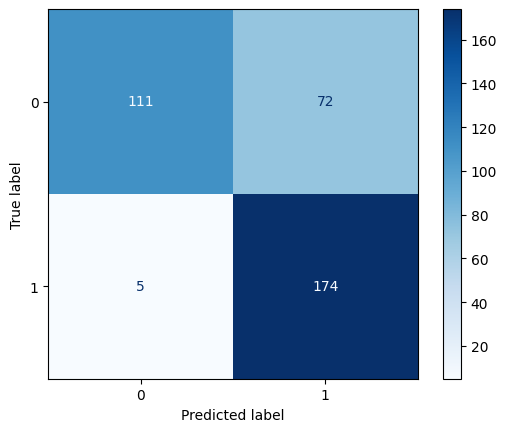

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # 임계값 0.5로 이진 분류

# 혼동 행렬 생성 및 시각화
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# 정확도, 민감도, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)  # 민감도(Sensitivity)
f1 = f1_score(y_test, y_pred_classes)

# 결과 출력
print(f"Accuracy (정확도): {accuracy:.2f}")
print(f"Sensitivity (민감도, Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_17' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_18' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


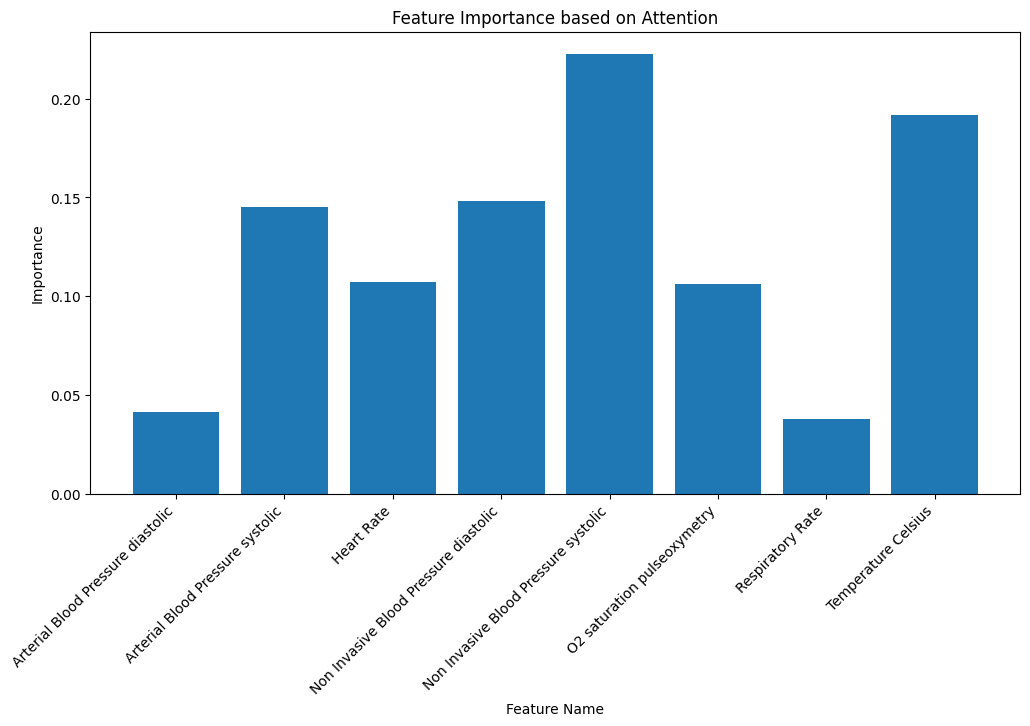

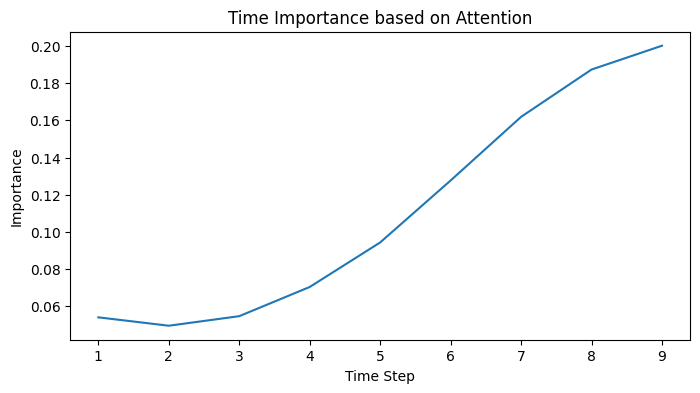

In [ ]:
# Step 8: Feature 및 시간별 Attention 분석
attention_model = Model(inputs=input_layer, outputs=[time_attention_weights, feature_attention_weights])
time_weights, feature_weights = attention_model.predict(X_test)

# Attention 가중치 시각화
import matplotlib.pyplot as plt

# Feature별 중요도 시각화
average_feature_weights = np.mean(feature_weights, axis=0)
plt.figure(figsize=(12, 6))
plt.bar(features, average_feature_weights)
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.title("Feature Importance based on Attention")
plt.xticks(rotation=45, ha="right")
plt.show()

# 시간별 Attention 중요도 시각화
average_time_weights = np.mean(time_weights, axis=0).squeeze()
plt.figure(figsize=(8, 4))
plt.plot(range(1, time_steps + 1), average_time_weights)
plt.xlabel("Time Step")
plt.ylabel("Importance")
plt.title("Time Importance based on Attention")
plt.show()

### 테스트 데이터를 이용해 모델 구성 후 ed데이터를 분류하기

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, Permute, Multiply, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Step 1: 데이터 병합 및 준비
arrested_data = pd.read_csv('/content/drive/MyDrive/DA_project/adjusted_data_fixed.csv')
non_arrested_data = pd.read_csv('/content/drive/MyDrive/DA_project/non_arrested_adjusted_data_fixed.csv')

arrested_data['label'] = 1
non_arrested_data['label'] = 0
combined_data = pd.concat([arrested_data, non_arrested_data])

features = [
    'Arterial Blood Pressure diastolic',
    'Arterial Blood Pressure systolic',
    'Heart Rate',
    'Non Invasive Blood Pressure diastolic',
    'Non Invasive Blood Pressure systolic',
    'O2 saturation pulseoxymetry',
    'Respiratory Rate',
    'Temperature Celsius'
]

# Step 2: stay_id별로 피처와 라벨 생성
X = combined_data.groupby('stay_id')[features].apply(
    lambda group: group.values.reshape(1, 5, len(features))
).values  # (stay_id_samples, time_steps=5, num_features)
X = np.vstack(X)  # 그룹 리스트를 numpy 배열로 변환

y = combined_data.groupby('stay_id')['label'].first().values  # stay_id당 첫 번째 label 값을 사용

# 크기 확인
print(f"X.shape = {X.shape}, y.shape = {y.shape}")
time_steps = 5

from imblearn.over_sampling import SMOTE

# 데이터 Reshape
X_flat = X.reshape(X.shape[0], -1)  # (샘플 수, time_steps * feature 수)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flat, y)

# Reshape to 3D
X_resampled = X_resampled.reshape(-1, time_steps, X.shape[2])
X = X_resampled
y = y_resampled



X.shape = (695, 5, 8), y.shape = (695,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Lambda, Multiply
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: 입력 정의
time_steps = 5  # 시간 축의 길이
num_features = len(features)  # Feature의 수
input_layer = Input(shape=(time_steps, num_features))

# Step 2: 마스킹 및 LSTM 레이어
masked_layer = Masking(mask_value=-1)(input_layer)  # -1을 마스킹 처리
lstm_out = LSTM(64, return_sequences=True)(masked_layer)  # LSTM 레이어

# Step 3: 시간별 Attention
time_attention_scores = Dense(1, activation='tanh')(lstm_out)  # 시간별 Attention 스코어
time_attention_weights = Lambda(lambda x: tf.expand_dims(tf.nn.softmax(tf.squeeze(x, axis=-1), axis=1), axis=-1))(
    time_attention_scores)  # Attention 가중치 계산
time_context_vector = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1))([time_attention_weights, lstm_out])  # Context Vector

# Step 4: Feature별 Attention
time_context_vector_expanded = Dense(num_features)(time_context_vector)  # Feature 차원 확장
feature_attention_scores = Dense(num_features, activation='tanh')(time_context_vector_expanded)  # Feature별 Attention 스코어
feature_attention_weights = Lambda(lambda x: tf.nn.softmax(x, axis=-1))(feature_attention_scores)  # Feature Attention 가중치 계산

# Feature별 가중치 적용
weighted_features = Multiply()([time_context_vector_expanded, feature_attention_weights])

# Step 5: 최종 출력
output = Dense(1, activation='sigmoid')(weighted_features)  # 이진 분류 출력

# 모델 생성
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 7: 모델 학습
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_62' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_63' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21            │ (None, 5, 8)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_20 (NotEqual)   │ (None, 5, 8)           │              0 │ input_layer_21[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking_20 (Masking)      │ (None, 5, 8)           │              0 │ input_layer_21[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any_20 (Any)              │ (None, 5)              │              0 │ not_equal_20[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_21 (LSTM)            │ (None, 5, 64)          │         18,688 │ masking_20[0][0],      │
│                           │                        │                │ any_20[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_83 (Dense)          │ (None, 5, 1)           │             65 │ lstm_21[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_62 (Lambda)        │ (None, 5, 1)           │              0 │ dense_83[0][0],        │
│                           │                        │                │ any_20[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_63 (Lambda)        │ (None, 64)             │              0 │ lambda_62[0][0],       │
│                           │                        │                │ lstm_21[0][0],         │
│                           │                        │                │ any_20[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_84 (Dense)          │ (None, 8)              │            520 │ lambda_63[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_85 (Dense)          │ (None, 8)              │             72 │ dense_84[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_64 (Lambda)        │ (None, 8)              │              0 │ dense_85[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_21 (Multiply)    │ (None, 8)              │              0 │ dense_84[0][0],        │
│                           │                        │                │ lambda_64[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_86 (Dense)          │ (None, 1)              │              9 │ multiply_21[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 19,354 (75.60 KB)

 Trainable params: 19,354 (75.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.5057 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5526 - loss: 0.6859 - val_accuracy: 0.5773 - val_loss: 0.6896
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5872 - loss: 0.6666 - val_accuracy: 0.5773 - val_loss: 0.6813
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6311 - loss: 0.6436 - val_accuracy: 0.5361 - val_loss: 0.6560
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6084 - loss: 0.6163 - val_accuracy: 0.6649 - val_loss: 0.6247
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6628 - loss: 0.6071 - val_accuracy: 0.6959 - val_loss: 0.6078
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6746 - loss: 0.5959 - val_accuracy: 0.6546 - val_loss: 0.6387
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6833 - loss: 0.5726 - val_accuracy: 0.6443 - val_lo

In [ ]:
ed_test_set = pd.read_csv('/content/drive/MyDrive/DA_project/ed_test_set.csv')
ed_test_set

,stay_id,charttime,Temperature Celsius,Heart Rate,Respiratory Rate,O2 saturation pulseoxymetry,Arterial Blood Pressure systolic,Arterial Blood Pressure diastolic,Non Invasive Blood Pressure diastolic,Non Invasive Blood Pressure systolic,Arterial Blood Pressure missing,Temperature Celsius missing,arrested,cardiac_arrest
0,30001785.0,2151-09-02 16:32:00,0.648649,0.516854,0.400000,1.0,0.476793,0.538462,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1,30001785.0,2151-09-02 16:52:00,0.648649,0.516854,0.400000,1.0,0.489451,0.493590,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2,30001785.0,2151-09-02 17:07:00,0.648649,0.511236,0.400000,1.0,0.413502,0.435897,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3,30001785.0,2151-09-02 17:17:00,0.648649,0.516854,0.563636,1.0,0.468354,0.474359,-1.0,-1.0,-1.0,-1.0,0.0,0.0
4,30001785.0,2151-09-02 17:32:00,0.648649,0.516854,0.400000,1.0,0.489451,0.480769,-1.0,-1.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,39982560.0,2165-05-09 07:22:00,0.654054,0.522472,0.363636,1.0,0.556962,0.435897,-1.0,-1.0,-1.0,-1.0,0.0,0.0
821,39982560.0,2165-05-09 07:37:00,0.654054,0.522472,0.363636,1.0,0.556962,0.435897,-1.0,-1.0,-1.0,-1.0,0.0,0.0
822,39982560.0,2165-05-09 07:52:00,0.654054,0.522472,0.363636,1.0,0.556962,0.435897,-1.0,-1.0,-1.0,-1.0,0.0,0.0
823,39982560.0,2165-05-09 08:07:00,0.654054,0.522472,0.363636,1.0,0.556962,0.435897,-1.0,-1.0,-1.0,-1.0,0.0,0.0


In [ ]:
# Re-import necessary libraries and reload the dataset
import numpy as np
import pandas as pd

# Reloading the dataset
file_path = '/content/drive/MyDrive/DA_project/ed_test_set.csv'
ed_test_set = pd.read_csv(file_path)
ed_test_set['charttime'] = pd.to_datetime(ed_test_set['charttime'])

# Features and time steps
features = [
    'Arterial Blood Pressure diastolic',
    'Arterial Blood Pressure systolic',
    'Heart Rate',
    'Non Invasive Blood Pressure diastolic',
    'Non Invasive Blood Pressure systolic',
    'O2 saturation pulseoxymetry',
    'Respiratory Rate',
    'Temperature Celsius'
]
time_steps = 5

# Generate X and y with the condition for 5 rows per stay_id
X = []
y = []

for stay_id, group in ed_test_set.groupby('stay_id'):
    group = group.sort_values('charttime')  # Sort by charttime
    if len(group) == time_steps:  # Use only groups with exactly 5 rows
        segment = group.iloc[-time_steps:][features].values
        X.append(segment)
        y.append(1)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Filter out segments where all rows are identical
unique_segments = []
unique_labels = []

for segment, label in zip(X, y):
    if not (segment[0] == segment).all():  # Check if all rows in all features are identical
        unique_segments.append(segment)
        unique_labels.append(label)

# Convert back to numpy arrays
X_filtered = np.array(unique_segments)
y_filtered = np.array(unique_labels)

# Output the shapes of the filtered arrays
X_filtered.shape, y_filtered.shape


((57, 5, 8), (57,))

In [ ]:
# y_test가 0인 인덱스 찾기
indices_y_test_0 = np.where(y_test == 0)[0]

# 해당 인덱스를 사용하여 X_test와 y_test에서 추출
X_test_y0 = X_test[indices_y_test_0]
y_test_y0 = y_test[indices_y_test_0]

# 결과 확인
print(f"X_test_y0.shape = {X_test_y0.shape}")
print(f"y_test_y0.shape = {y_test_y0.shape}")


X_test_y0.shape = (122, 5, 8)
y_test_y0.shape = (122,)


In [ ]:
import numpy as np

# X_test_ed, y_test_ed와 X_test_y0, y_test_y0 합치기
X_test_combined = np.concatenate([X_filtered, X_test_y0], axis=0)
y_test_combined = np.concatenate([y_filtered, y_test_y0], axis=0)

# 결과 확인
print(f"X_test_combined.shape = {X_test_combined.shape}")
print(f"y_test_combined.shape = {y_test_combined.shape}")


X_test_combined.shape = (179, 5, 8)
y_test_combined.shape = (179,)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy (정확도): 0.84
Sensitivity (민감도, Recall): 1.00
Specificity (특이도): 0.76
F1 Score: 0.80


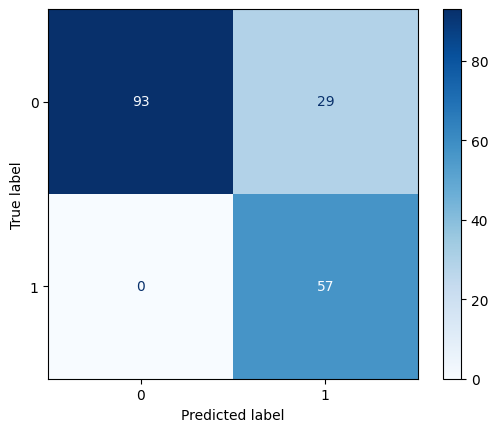

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_combined)
y_pred_classes = (y_pred > 0.5).astype(int)  # 임계값 0.5로 이진 분류

# 혼동 행렬 생성 및 시각화
cm = confusion_matrix(y_test_combined, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# 특이도(Specificity) 계산
tn, fp, fn, tp = cm.ravel()  # 혼동 행렬의 요소 분해
specificity = tn / (tn + fp)  # 특이도 계산

# 정확도, 민감도, F1 점수 계산
accuracy = accuracy_score(y_test_combined, y_pred_classes)
recall = recall_score(y_test_combined, y_pred_classes)  # 민감도(Sensitivity)
f1 = f1_score(y_test_combined, y_pred_classes)

# 결과 출력
print(f"Accuracy (정확도): {accuracy:.2f}")
print(f"Sensitivity (민감도, Recall): {recall:.2f}")
print(f"Specificity (특이도): {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")


1/8 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_62' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'lambda_63' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


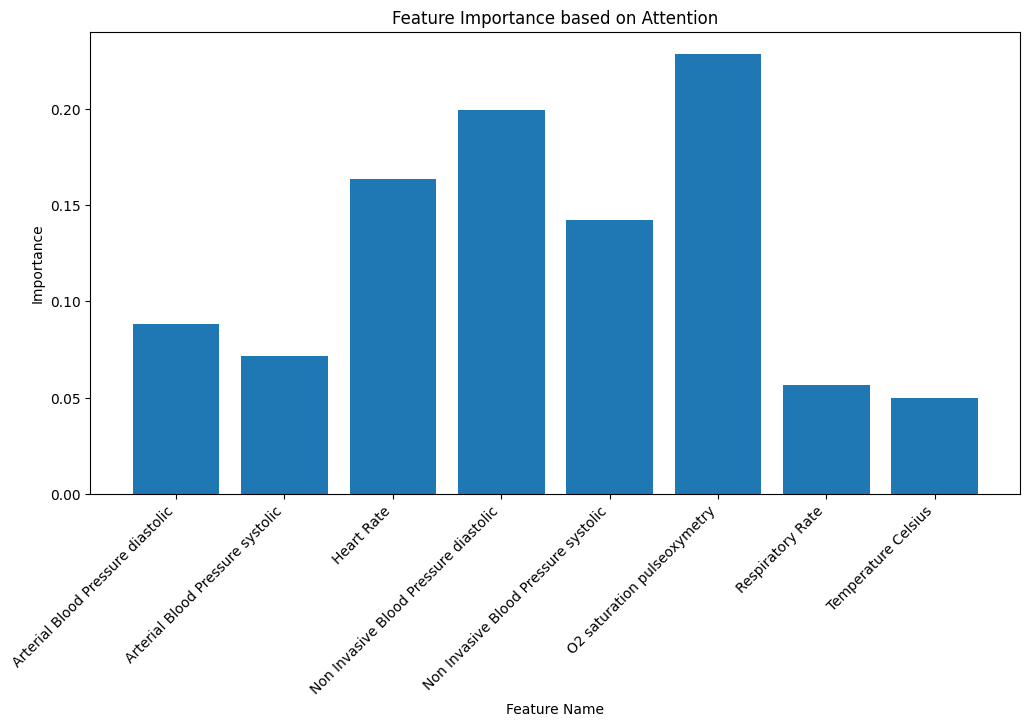

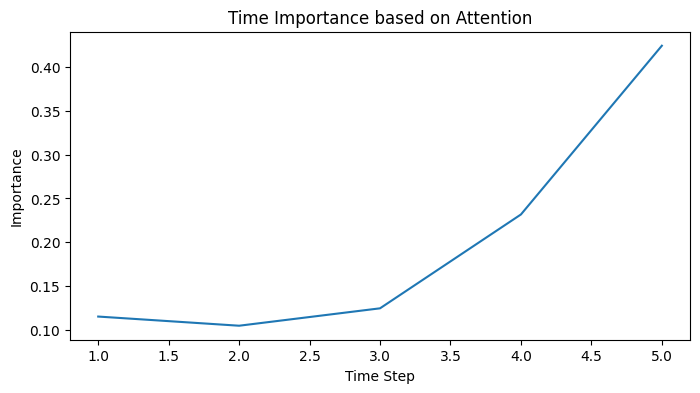

In [ ]:
# Step 8: Feature 및 시간별 Attention 분석
attention_model = Model(inputs=input_layer, outputs=[time_attention_weights, feature_attention_weights])
time_weights, feature_weights = attention_model.predict(X_test)

# Attention 가중치 시각화
import matplotlib.pyplot as plt

# Feature별 중요도 시각화
average_feature_weights = np.mean(feature_weights, axis=0)
plt.figure(figsize=(12, 6))
plt.bar(features, average_feature_weights)
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.title("Feature Importance based on Attention")
plt.xticks(rotation=45, ha="right")
plt.show()

# 시간별 Attention 중요도 시각화
average_time_weights = np.mean(time_weights, axis=0).squeeze()
plt.figure(figsize=(8, 4))
plt.plot(range(1, time_steps + 1), average_time_weights)
plt.xlabel("Time Step")
plt.ylabel("Importance")
plt.title("Time Importance based on Attention")
plt.show()